<a href="https://colab.research.google.com/github/AbhishekDGoudar/Kaggle_walmart_sales/blob/main/ASDS55302_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

 !pip install numpy ISLP numpy pandas statsmodels matplotlib category_encoders

In [ ]:
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_walmart = pd.read_csv("https://adg6610.uta.cloud/dataset/Walmart.csv")
columns = {"Date": "date",
           "Fuel_Price": "fuel_price",
           "Temperature": "temperature",
           "CPI": "cpi",
           "Unemployment": "unemployment",
           "Holiday_Flag": "holiday_flag",
           "Store": "store",
           "Weekly_Sales": "weekly_sales"
           }
df_walmart = df_walmart.rename(columns=columns)
df_walmart.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
## Date Operations

df_walmart["date"] = pd.to_datetime(df_walmart["date"])

df_walmart["year"] = df_walmart["date"].dt.year
df_walmart["quarter"] = df_walmart["date"].dt.quarter
df_walmart["month"] = df_walmart["date"].dt.month
df_walmart["week"] = df_walmart["date"].dt.isocalendar().week

df_walmart.head()

df_walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   quarter       6435 non-null   int64         
 10  month         6435 non-null   int64         
 11  week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(5)
memory usage: 584.6 KB


<ipython-input-4-beaf181ebc72>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_walmart["date"] = pd.to_datetime(df_walmart["date"])


In [ ]:
print(df_walmart.columns)

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'month',
       'week'],
      dtype='object')


In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   quarter       6435 non-null   int64         
 10  month         6435 non-null   int64         
 11  week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(5)
memory usage: 584.6 KB


In [ ]:
### Extracting the minimum and maximum dates present within our dataset

min_date = df_walmart["date"].min()
print(min_date)

max_date = df_walmart["date"].max()
print(max_date)

2010-01-10 00:00:00
2012-12-10 00:00:00


Data Preprocessing


In [ ]:
df_walmart_prepd = df_walmart.copy()
df_walmart_prepd.drop(['year', 'quarter'], axis = 1,
                      inplace = True)
df_walmart_prepd["store"] = df_walmart_prepd["store"].astype("object")
df_walmart_prepd["holiday_flag"] = df_walmart_prepd["holiday_flag"].astype("object")
df_walmart_prepd["week"] = df_walmart_prepd["week"].astype("object")
df_walmart_prepd["month"] = df_walmart_prepd["month"].astype("object")

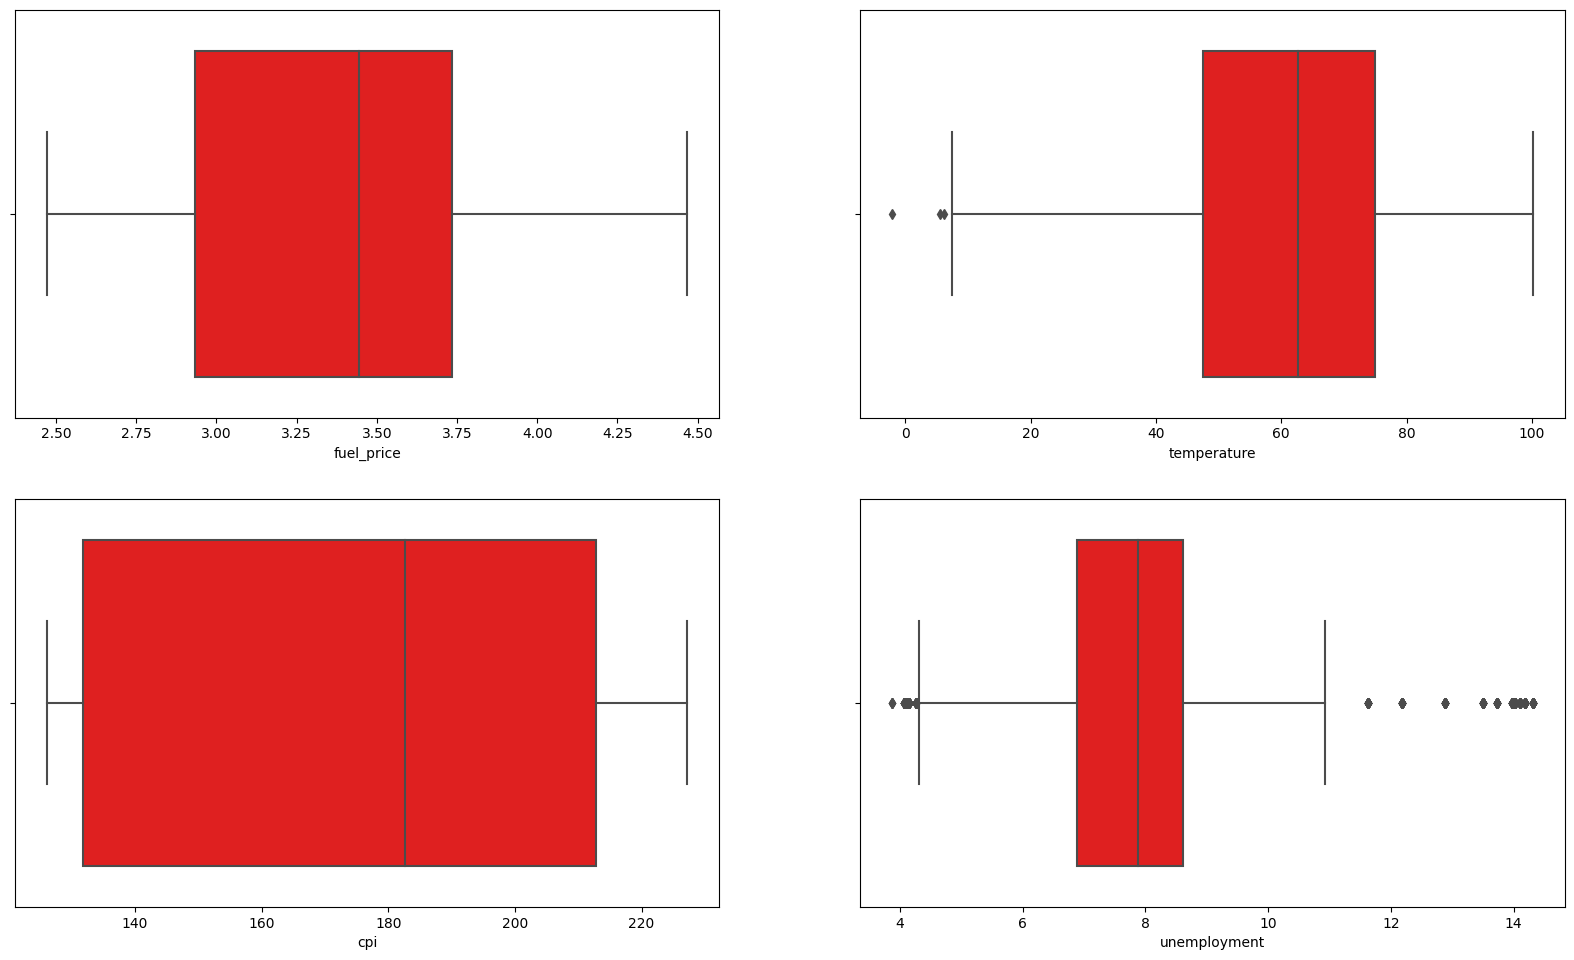

In [ ]:
columns = ["fuel_price", "temperature", "cpi", "unemployment"]
plt.figure(figsize=(20, 18))
for i, column in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df_walmart_prepd, x=column, color="red")
plt.show()

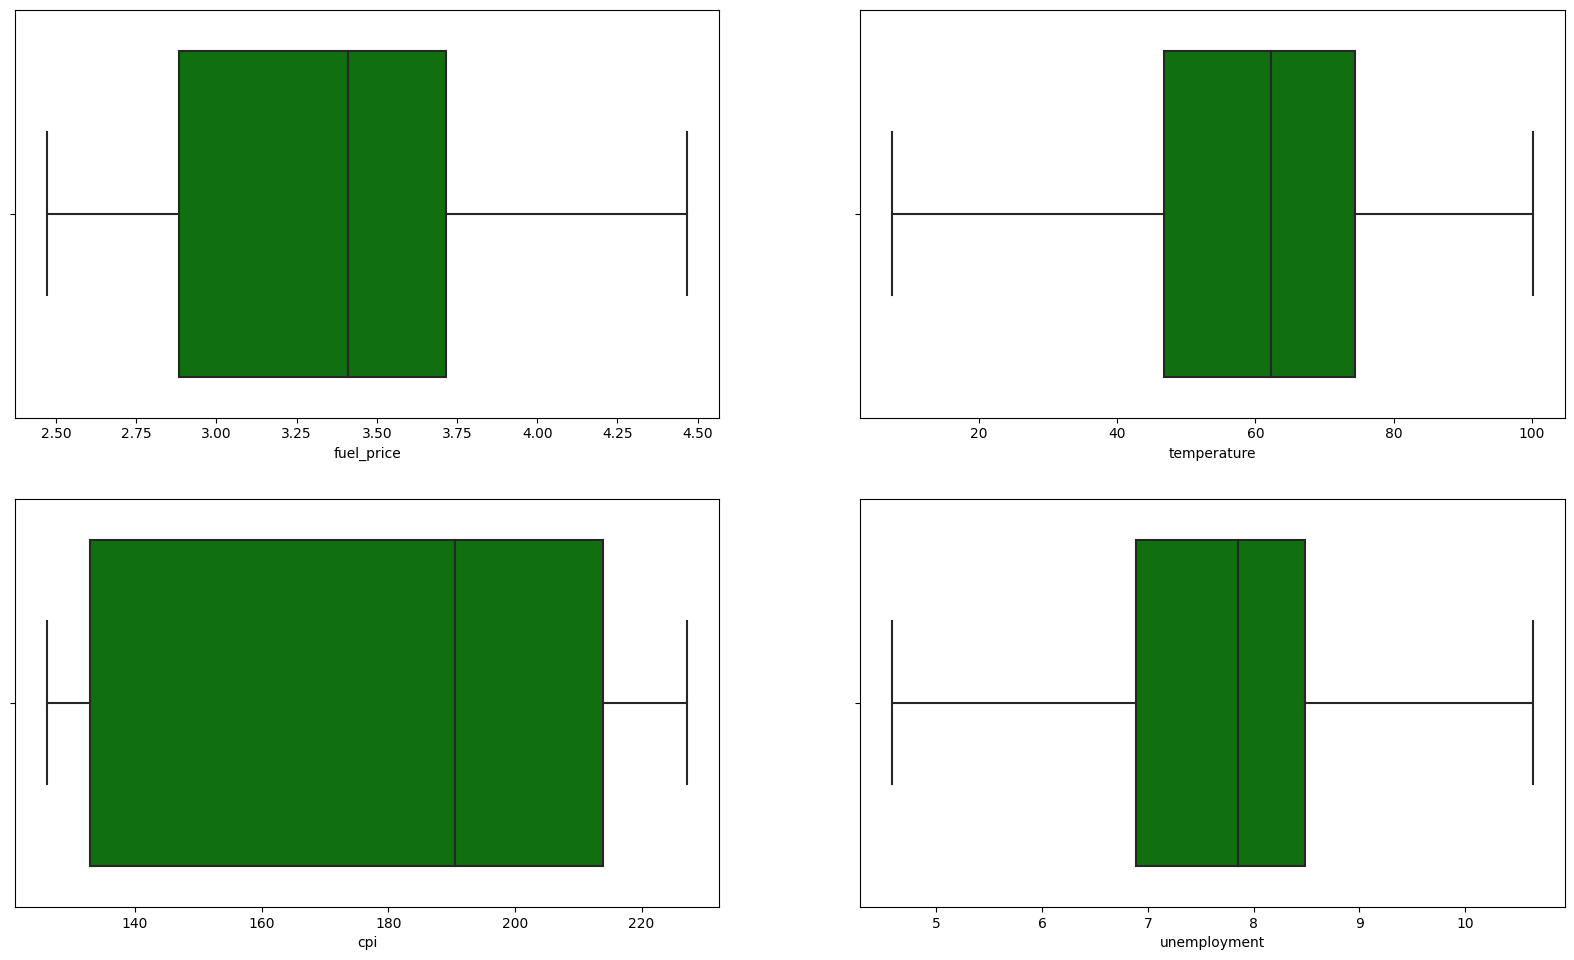

In [ ]:
### Removing the outliers

df_walmart_prepd.drop(df_walmart_prepd[df_walmart_prepd["temperature"] < 7
                                       ].index, axis=0,
                      inplace=True)

df_walmart_prepd.drop(df_walmart_prepd[(df_walmart_prepd["unemployment"]<4.5)
                                       |
                                       (df_walmart_prepd["unemployment"]>10.8)
                                       ].index,
                      axis=0, inplace=True)

columns = ["fuel_price", "temperature", "cpi", "unemployment"]
plt.figure(figsize=(20, 18))
for i, column in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df_walmart_prepd, x=column, color="green")
plt.show()


In [ ]:
numerical_features = df_walmart.select_dtypes("number").columns.to_list()
[numerical_features.remove(col) for col in ["week", "month", "year", "quarter", "store", "holiday_flag"]]
display(df_walmart[numerical_features].describe())

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [ ]:
median = df_walmart[numerical_features].median()
median

weekly_sales    960746.040000
temperature         62.670000
fuel_price           3.445000
cpi                182.616521
unemployment         7.874000
dtype: float64

In [ ]:
mode = df_walmart[numerical_features].mode()
mode

,weekly_sales,temperature,fuel_price,cpi,unemployment
0,209986.25,50.43,3.638,126.064000,8.099
1,213538.32,NaN,NaN,126.076645,NaN
2,215359.21,NaN,NaN,126.085452,NaN
3,219804.85,NaN,NaN,126.089290,NaN
4,220060.35,NaN,NaN,126.101935,NaN
...,...,...,...,...,...
6430,3595903.20,NaN,NaN,NaN,NaN
6431,3676388.98,NaN,NaN,NaN,NaN
6432,3749057.69,NaN,NaN,NaN,NaN
6433,3766687.43,NaN,NaN,NaN,NaN


In [ ]:
min_values = df_walmart.min(numeric_only=True)
max_values = df_walmart.max(numeric_only=True)
range_values = max_values - min_values
range_values

store           4.400000e+01
weekly_sales    3.608700e+06
holiday_flag    1.000000e+00
temperature     1.022000e+02
fuel_price      1.996000e+00
cpi             1.011688e+02
unemployment    1.043400e+01
year            2.000000e+00
quarter         3.000000e+00
month           1.100000e+01
week            5.100000e+01
dtype: float64

In [ ]:
variance = df_walmart.var(numeric_only=True)
print(variance)

store           1.686929e+02
weekly_sales    3.185097e+11
holiday_flag    6.504996e-02
temperature     3.402155e+02
fuel_price      2.106991e-01
cpi             1.548951e+03
unemployment    3.518944e+00
year            6.352398e-01
quarter         1.173247e+00
month           1.103433e+01
week            2.105922e+02
dtype: float64


In [ ]:
df_walmart_corr = df_walmart.copy()
df_walmart_corr.drop("store", axis=1, inplace=True)
corr = df_walmart_corr.corr()
weekly_sales_corr = corr['weekly_sales']
weekly_sales_corr

<ipython-input-16-2305af65a9b2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_walmart_corr.corr()


weekly_sales    1.000000
holiday_flag    0.036891
temperature    -0.063810
fuel_price      0.009464
cpi            -0.072634
unemployment   -0.106176
year           -0.018378
quarter         0.056804
month           0.067535
week            0.066105
Name: weekly_sales, dtype: float64

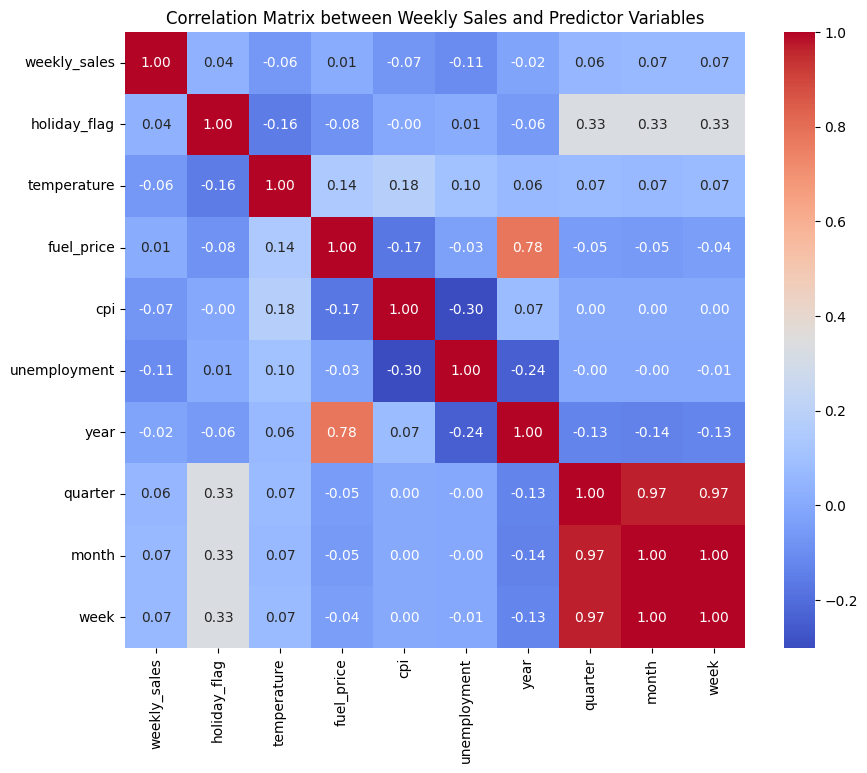

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix between Weekly Sales and Predictor Variables")
plt.show()

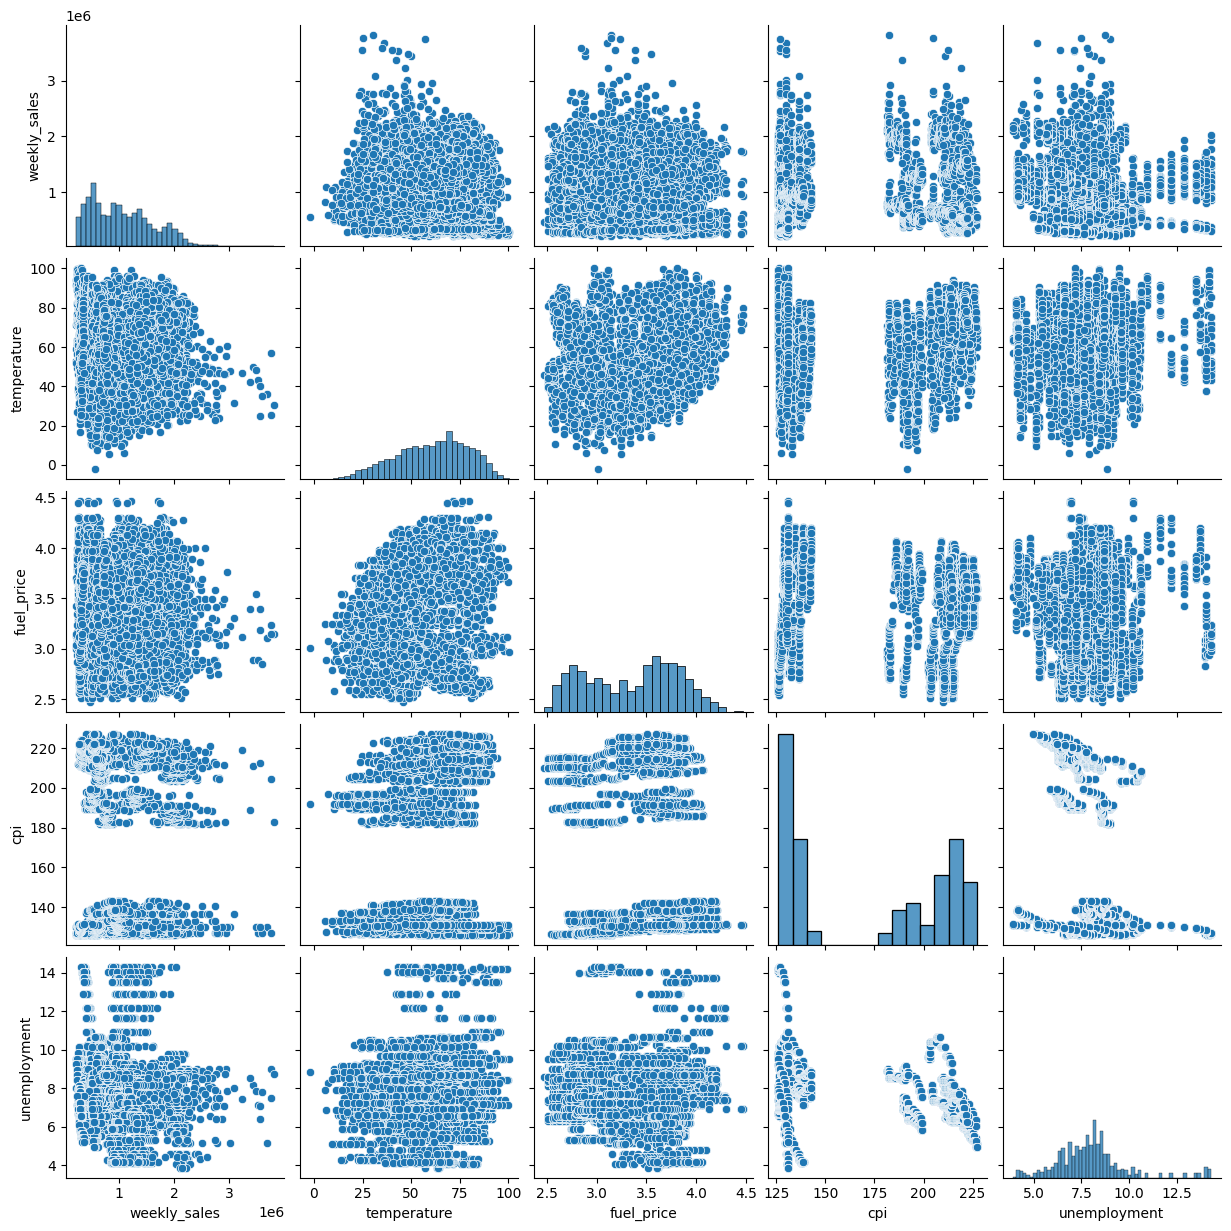

In [ ]:
pairplot = sns.pairplot(df_walmart, vars=['weekly_sales','temperature', 'fuel_price', 'cpi', 'unemployment'])
pairplot

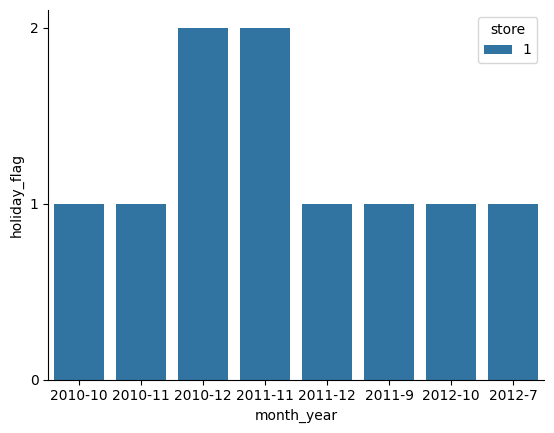

In [ ]:
from matplotlib.ticker import MultipleLocator

df_walmart_holiday_analysis = df_walmart.copy(deep=True)
df_walmart_holiday_analysis["month_year"
                            ] = df_walmart_holiday_analysis["date"
                                                            ].map(
                                                                  lambda x: str(x.year)+"-"+ str(x.month
                                  ))
df_walmart_holiday = (df_walmart_holiday_analysis[["month_year", "holiday_flag", "store"]]
 [df_walmart_holiday_analysis["holiday_flag"]==1
  ].groupby(["month_year", "store"]
            ).sum(

            ).reset_index()
)

ax = sns.barplot(data=df_walmart_holiday[df_walmart_holiday["store"] <= 1],
                 x='month_year', y='holiday_flag', hue="store",
                 estimator=sum)
ax.yaxis.set_major_locator(MultipleLocator(1))
sns.despine()


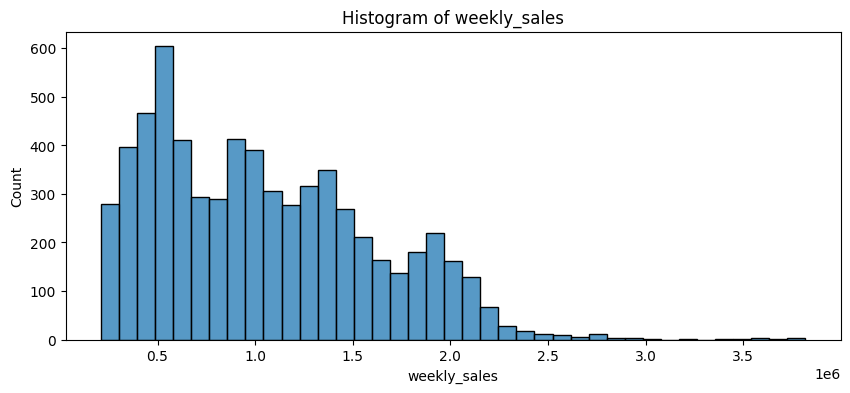

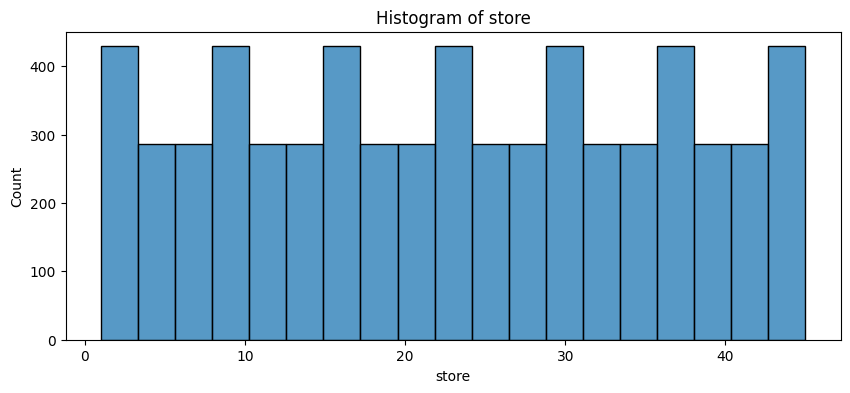

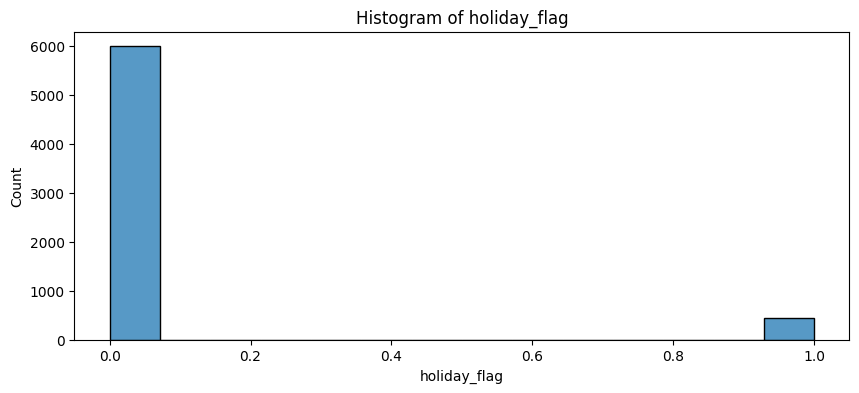

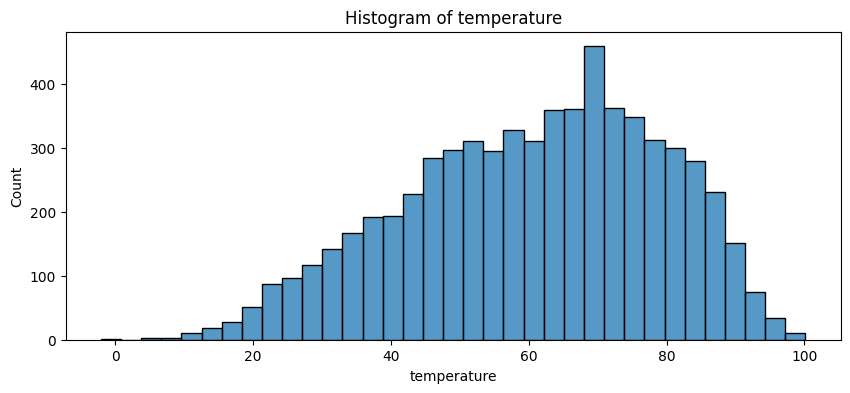

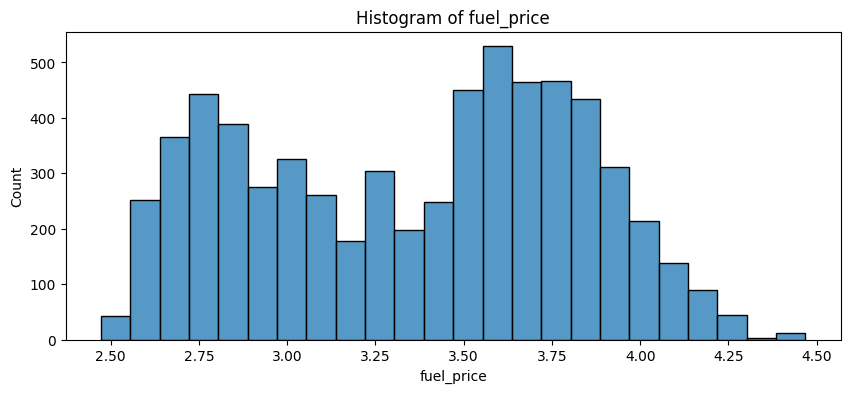

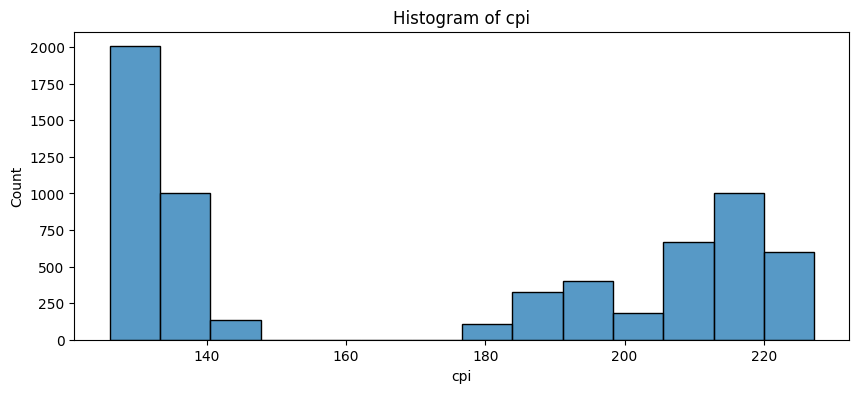

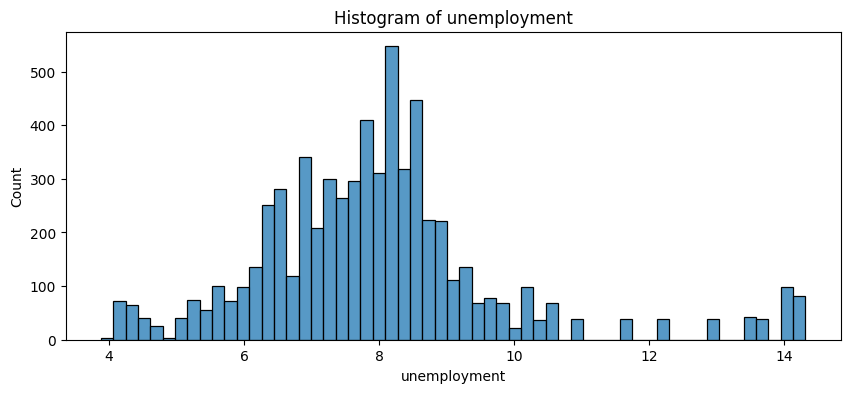

In [ ]:
### Plotting histogram of all the variables to showcase their distribution


variables = ["weekly_sales", 'store', 'holiday_flag', "temperature", "fuel_price", "cpi", "unemployment"]

for var in variables:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_walmart[var], kde=False)
    plt.title(f'Histogram of {var}')
    plt.show()

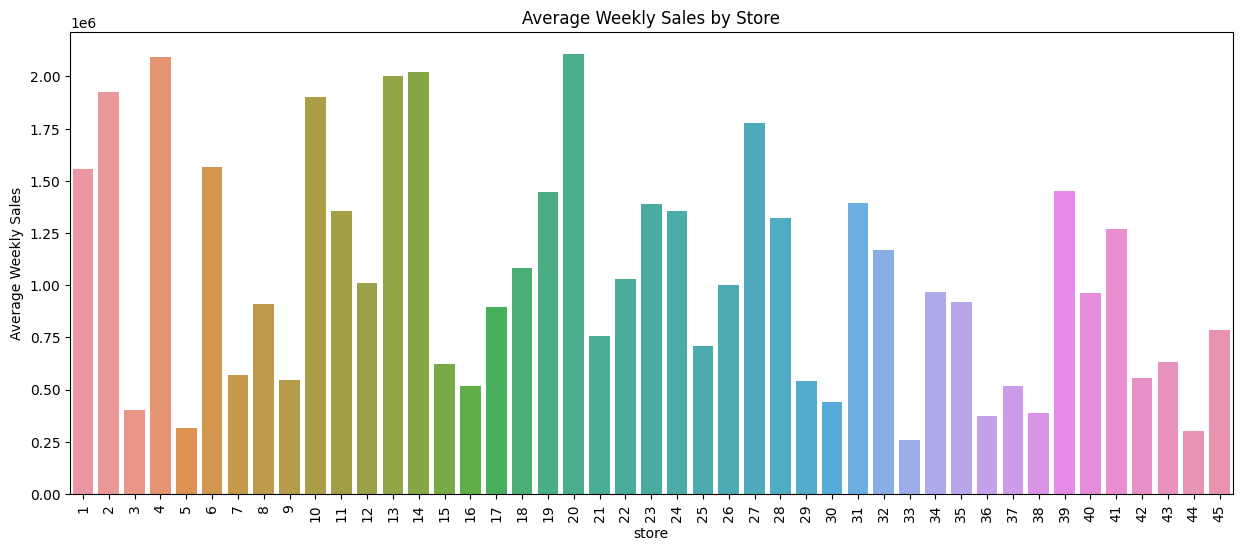

In [ ]:
### Plotting bar graph between "Weekly Sales" and cateogircal predictor variable "Store"

### Grouping data by 'Store' and calculate mean of 'Weekly_Sales'
store_sales = df_walmart.groupby('store')['weekly_sales'].mean().reset_index()

### Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='store', y='weekly_sales', data=store_sales)
plt.title('Average Weekly Sales by Store')
plt.xlabel('store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.show()


<ipython-input-22-4d54f75e8dd3>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_walmart['week'] = df_walmart['date'].dt.week


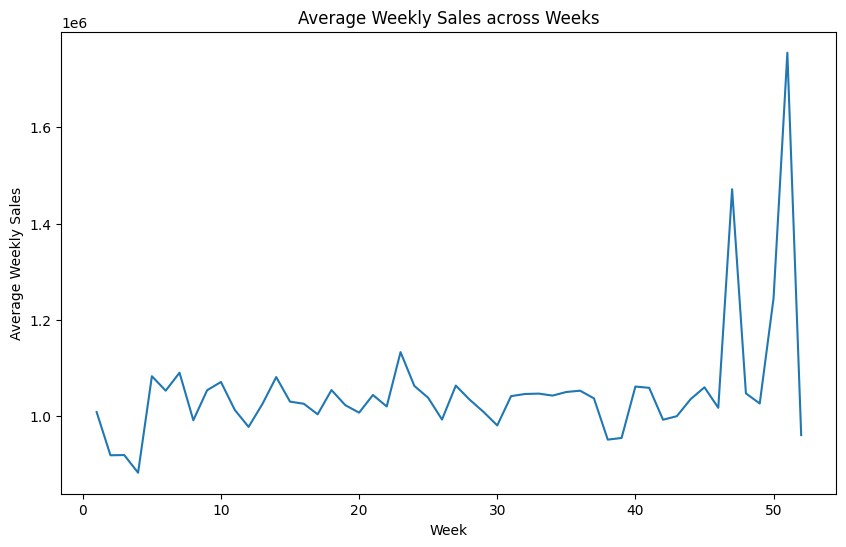

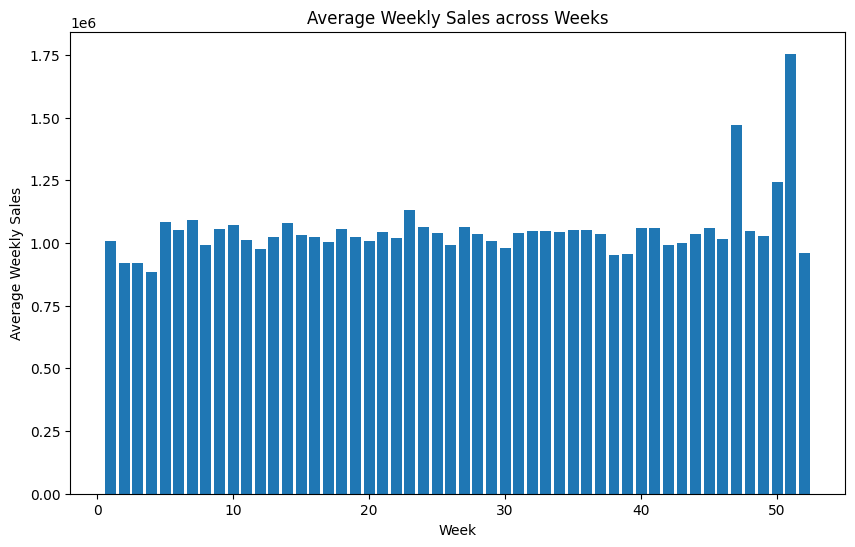

In [ ]:
### Extracting the Week from the Date Column

df_walmart['week'] = df_walmart['date'].dt.week

### Grouping by 'Week' and calculating the mean of "weekly_sales"

weekly_sales = df_walmart.groupby('week')["weekly_sales"].mean()

### Plotting Average Weekly Sales across Weeks using line graph

plt.figure(figsize=(10, 6))
weekly_sales.plot()
plt.title('Average Weekly Sales across Weeks')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.show()

### Plotting Average Weekly Sales across Weeks using bar graph

plt.figure(figsize=(10, 6))
plt.bar(weekly_sales.index, weekly_sales)
plt.title('Average Weekly Sales across Weeks')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.show()

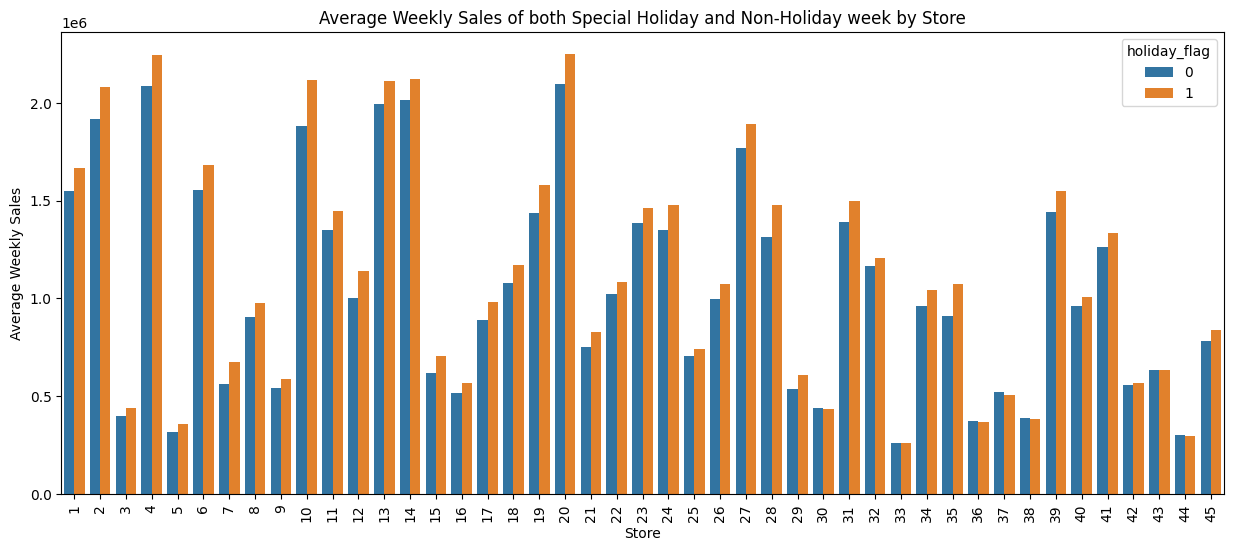

In [ ]:
### Grouping Weekly Sales by Store and Holiday Flag

Store_group = df_walmart.groupby(['store', 'holiday_flag'])["weekly_sales"].mean().reset_index()

### Plotting a bar graph that shows the results of the above grouping

plt.figure(figsize=(15, 6))
sns.barplot(x='store', y = ("weekly_sales"), hue = 'holiday_flag', data = Store_group)
plt.title('Average Weekly Sales of both Special Holiday and Non-Holiday week by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:

print(df_walmart.columns)

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'month',
       'week'],
      dtype='object')


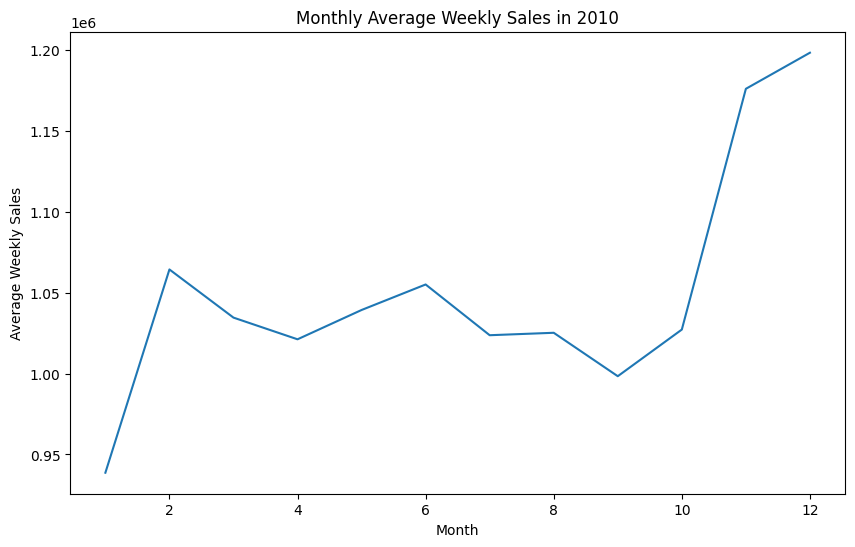

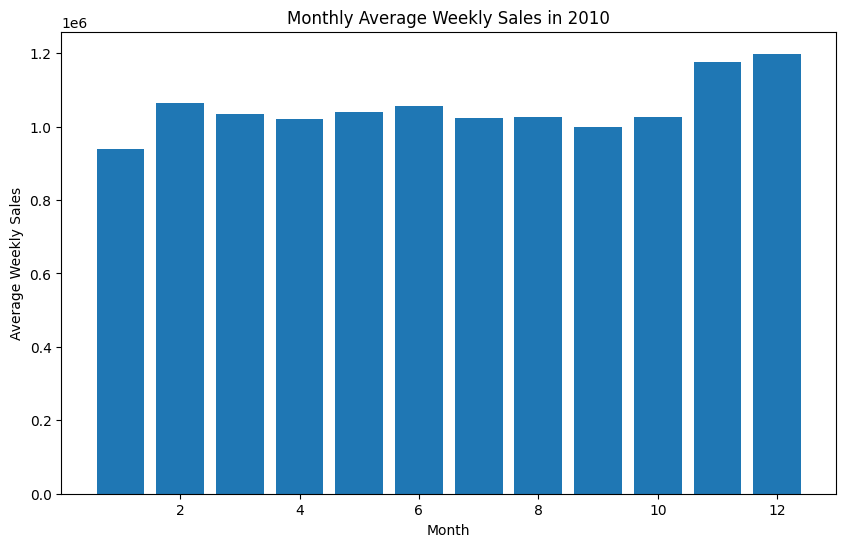

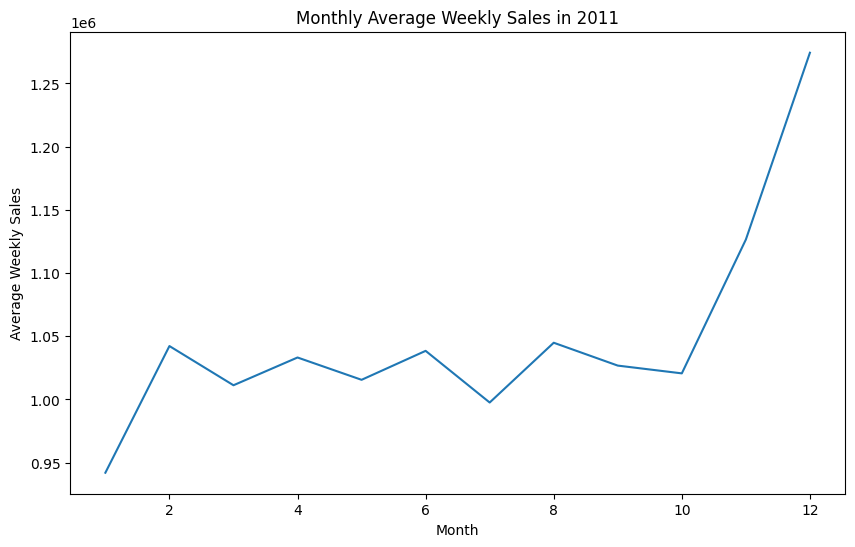

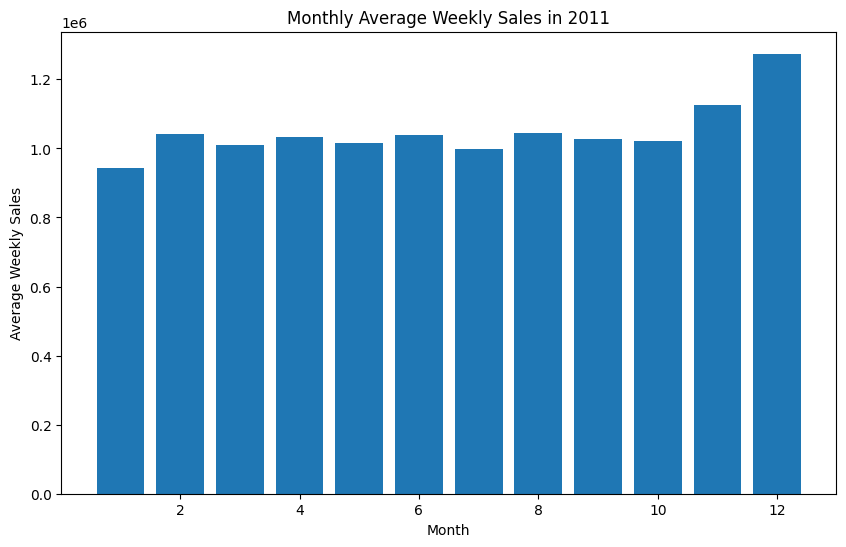

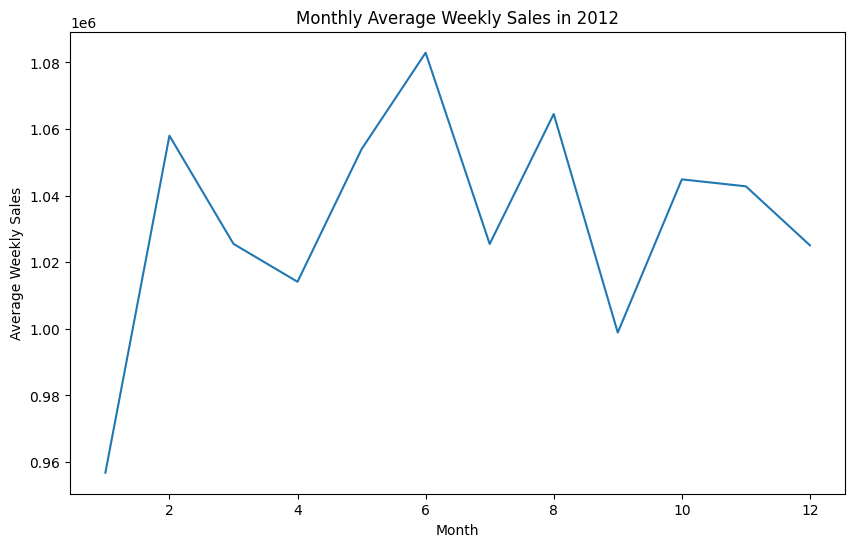

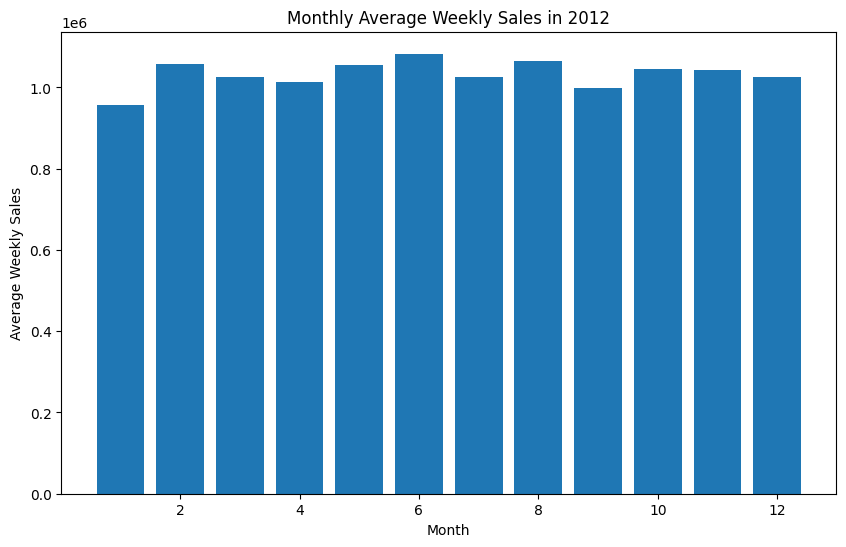

In [ ]:

### Accessing data from dataset "Walmart" for only 2010

df_walmart_2010 = df_walmart[df_walmart.year == 2010]

### Grouping by 'Month' and calculating the mean of "weekly_sales" for 2010

monthly_sales_2010 = df_walmart_2010.groupby('month')["weekly_sales"].mean()

### Plotting Monthly Average Weekly Sales for 2010 using line graph

plt.figure(figsize=(10, 6))
monthly_sales_2010.plot()
plt.title('Monthly Average Weekly Sales in 2010')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

### Plotting Monthly Average Weekly Sales for 2010 using bar graph

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2010.index, monthly_sales_2010)
plt.title('Monthly Average Weekly Sales in 2010')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

### Accessing data from dataset "Walmart" for only 2011

df_walmart_2011 = df_walmart[df_walmart.year == 2011]

### Grouping by 'Month' and calculating the mean of "weekly_sales" for 2011

monthly_sales_2011 = df_walmart_2011.groupby('month')["weekly_sales"].mean()

### Plotting the Monthly Average Weekly Sales for 2011 using line graph

plt.figure(figsize=(10, 6))
monthly_sales_2011.plot()
plt.title('Monthly Average Weekly Sales in 2011')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

### Plotting Monthly Average Weekly Sales for 2011 using bar graph

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2011.index, monthly_sales_2011)
plt.title('Monthly Average Weekly Sales in 2011')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

### Accessing data from dataset "Walmart" for only 2012

df_walmart_2012 = df_walmart[df_walmart.year == 2012]

### Grouping by 'Month' and calculating the mean of "weekly_sales" for 2012

monthly_sales_2012 = df_walmart_2012.groupby('month')["weekly_sales"].mean()

### Plotting the Monthly Average Weekly Sales for 2012 using line graph

plt.figure(figsize=(10, 6))
monthly_sales_2012.plot()
plt.title('Monthly Average Weekly Sales in 2012')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

### Plotting Monthly Average Weekly Sales for 2012 using bar graph

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2012.index, monthly_sales_2012)
plt.title('Monthly Average Weekly Sales in 2012')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
### Ask why 2011 is not returning the value wanted

### Extracting the Week from the Date Column

df_walmart['week'] = df_walmart['date'].dt.isocalendar().week

### Grouping by 'Week' and calculating the mean of 'Weekly_Sales' for 2010

weekly_sales_2010 = df_walmart_2010.groupby('week')['weekly_sales'].mean()

### Finding the number of the week with maximum sales in 2010

max_weekly_sales_2010 = weekly_sales_2010.idxmax()
print(max_weekly_sales_2010)


### Filtering the DataFrame for the week with maximum sales in 2010
# df_max_week_2010 = df_walmart[df_walmart['Week'] == max_weekly_sales_2010]
df_max_week_2010 = df_walmart_2010[df_walmart_2010['week'] == max_weekly_sales_2010]

### Finding the date with the highest sales in the week with maximum sales in 2010

date_max_sales_2010 = df_max_week_2010.groupby('date')['weekly_sales'].sum().idxmax()
print(date_max_sales_2010)

### Listing all unique dates for the week with maximum sales in 2010

dates_in_max_week = df_max_week_2010['date'].unique()
print(dates_in_max_week)

### Grouping by 'Week' and calculating the mean of 'Weekly_Sales' for 2011

weekly_sales_2011 = df_walmart_2011.groupby('week')['weekly_sales'].mean()

### Finding the number of the week with maximum sales in 2011

max_weekly_sales_2011 = weekly_sales_2011.idxmax()
print(max_weekly_sales_2011)

### Filtering the DataFrame for the week with maximum sales in 2011

# df_max_week_2011 = df_walmart[df_walmart['Week'] == max_weekly_sales_2011 & df_walmart["Year"]==2011]]
df_max_week_2011 = df_walmart_2011[df_walmart_2011['week'] == max_weekly_sales_2011]

### Finding the date with the highest sales in the week with maximum sales in 2011

date_max_sales = df_max_week_2011.groupby('date')['weekly_sales'].sum().idxmax()
print(date_max_sales, "1")

### Grouping by 'Week' and calculating the mean of 'Weekly_Sales' for 2012

weekly_sales_2012 = df_walmart_2012.groupby('week')['weekly_sales'].mean()

### Finding the number of week with maximum sales in 2012

max_weekly_sales_2012 = weekly_sales_2012.idxmax()
print(max_weekly_sales_2012)

### Filtering the DataFrame for the week with maximum sales in 2012

df_max_week_2012 = df_walmart_2012[df_walmart_2012['week'] == max_weekly_sales_2012]

### Finding the date with the highest sales in the week with maximum sales in 2012

date_max_sales = df_max_week_2012.groupby('date')['weekly_sales'].sum().idxmax()
print(date_max_sales)

### Listing all unique dates for the week with maximum sales in 2012 - doesn't make sense, i want all the dates that are within the week with highest sales in 2012

dates_in_max_week_2012 = df_max_week_2012['date'].unique()
print(dates_in_max_week_2012)


### I want to get the date of week with highest sales for each year and see their holiday flag index to see if they are categorized as holidays or not

51
2010-12-24 00:00:00
['2010-12-24T00:00:00.000000000']
51
2011-12-23 00:00:00 1
23
2012-06-04 00:00:00
['2012-06-04T00:00:00.000000000' '2012-06-07T00:00:00.000000000']


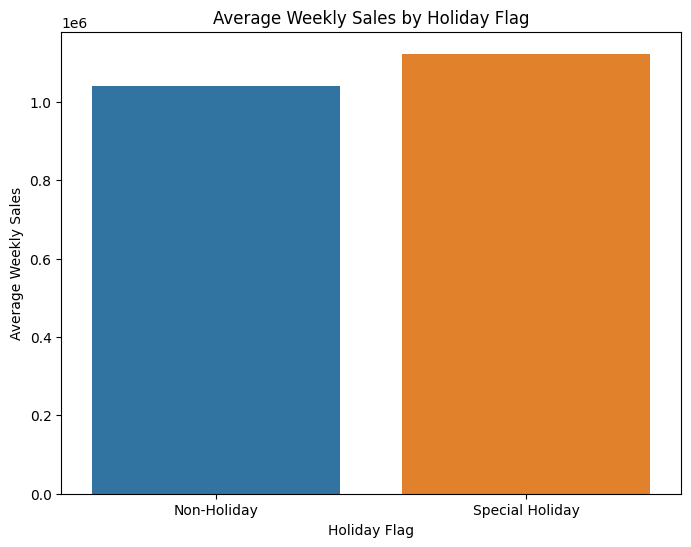

In [ ]:
### Converting 'Holiday Flag' variable into string
df_walmart["Holiday_Flag_Str"] = df_walmart["holiday_flag"].apply(lambda x:"Special Holiday" if x == 1 else "Non-Holiday")

### Grouping data by 'Holiday Flag' and calculate mean of 'Weekly_Sales'
Holiday_sales = df_walmart.groupby('Holiday_Flag_Str')['weekly_sales'].mean().reset_index()

### Plotting bar graph between "Weekly Sales" and cateogircal predictor variable "Holiday Flag"
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag_Str', y='weekly_sales', data= Holiday_sales)
plt.title('Average Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

In [ ]:
### just do it for one store instead, to show holidays had higher sales

### Accessing "Holiday_Flag" column of "Walmart" Dataset

holiday_flag = df_walmart['holiday_flag']

### Defining "Special Holiday" within "holiday_flag" column for Store 1

df_special_holiday_store_1 = df_walmart[(df_walmart['holiday_flag'] == 1)
                                        & (df_walmart['store'] == 1)]

### Defining "Non-Holiday" within "holiday_flag" column

df_non_holiday_store_1 = df_walmart[(df_walmart['holiday_flag'] == 0)
                                      & (df_walmart['store'] == 0)]

### Top 4 Highest Weekly Sales for Special Holiday

top_4_sales_sp = df_special_holiday_store_1.nlargest(4, 'weekly_sales')
print(top_4_sales_sp)

### Top 4 Highest Weekly Sales for Non-Holiday

top_4_sales_np = df_non_holiday_store_1.nlargest(4, 'weekly_sales')
print(top_4_sales_np)

### 4 Lowest Weekly Sales for Special Holiday

lowest_4_sales_sp = df_special_holiday_store_1.nsmallest(4, 'weekly_sales')
print(lowest_4_sales_sp)

### 4 Lowest Weekly Sales for Non-Holiday

lowest_4_sales_np = df_non_holiday_store_1.nsmallest(4, 'weekly_sales')
print(lowest_4_sales_np)


     store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
94       1 2011-11-25    2033320.66             1        60.14       3.236   
42       1 2010-11-26    1955624.11             1        64.52       2.735   
105      1 2012-10-02    1802477.43             1        48.02       3.409   
135      1 2012-07-09    1661767.33             1        83.96       3.730   

            cpi  unemployment  year  quarter  month  week Holiday_Flag_Str  
94   218.467621         7.866  2011        4     11    47  Special Holiday  
42   211.748433         7.838  2010        4     11    47  Special Holiday  
105  220.265178         7.348  2012        4     10    40  Special Holiday  
135  222.439015         6.908  2012        3      7    28  Special Holiday  
Empty DataFrame
Columns: [store, date, weekly_sales, holiday_flag, temperature, fuel_price, cpi, unemployment, year, quarter, month, week, Holiday_Flag_Str]
Index: []
    store       date  weekly_sales  holiday_flag  tempera

Statistical Testing


450
5985


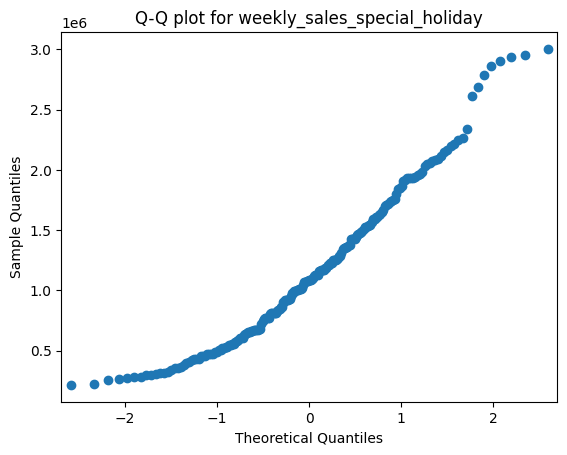

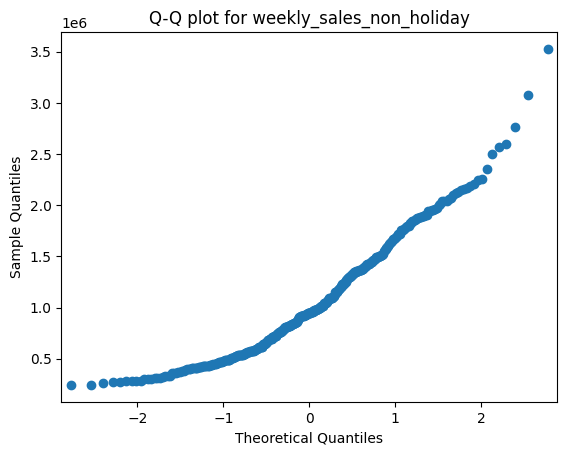

ShapiroResult(statistic=0.9501156806945801, pvalue=1.2626215948330355e-06)
ShapiroResult(statistic=0.938538670539856, pvalue=4.357995908588208e-11)
Levene's Test Statistic: 3.1590482041002486
P-Value: 0.0760422137546799
t-statistic: 2.1235059717291347
p-value (upper-tailed): 0.017071556359550686


In [ ]:
from scipy.stats import shapiro

### Defining Holiday Day

special_holiday = df_walmart[df_walmart['holiday_flag'] == 1]

### Defining Non-Holiday Day

non_holiday = df_walmart[df_walmart['holiday_flag'] == 0]

### Defining the Weekly Sales of Special Holiday

weekly_sales_special_holiday = special_holiday['weekly_sales']

### Generating random sample of the Weekly Sales of Special Holiday

population_size_sp = len(weekly_sales_special_holiday)
print(population_size_sp)

sample_size_sp = 208

random_sample_sp = weekly_sales_special_holiday.sample(n = sample_size_sp)

### Defining the Weekly Sales of Non Holiday

weekly_sales_non_holiday = non_holiday['weekly_sales']

### Generating random sample of the Weekly Sales of Non Holiday

population_size_np = len(weekly_sales_non_holiday)
print(population_size_np)

sample_size_np= 362

random_sample_np = weekly_sales_non_holiday.sample(n = sample_size_np)

### Generating a Q-Q plot for 'weekly_sales_special_holiday' to test for normality

sm.qqplot(random_sample_sp)
plt.title('Q-Q plot for weekly_sales_special_holiday')
plt.show()

### Generating a Q-Q plot for 'weekly_sales_non_holiday' to test for normality

sm.qqplot(random_sample_np)
plt.title('Q-Q plot for weekly_sales_non_holiday')
plt.show()

### Conducting Shapiro-Wilk Test on 'weekly_sales_special_holiday' to test for normality

shapiro_test_result_sp = shapiro(random_sample_sp)
print(shapiro_test_result_sp)

### Conducting Shapiro-Wilk Test on 'weekly_sales_non_holiday' to test for normality

shapiro_test_result_np = shapiro(random_sample_np)
print(shapiro_test_result_np)

from scipy.stats import levene

### Performing the Levene's test

stat, p = levene(random_sample_sp, random_sample_np)

### Printing results of Levene's test

print(f"Levene's Test Statistic: {stat}")
print(f"P-Value: {p}")

from scipy.stats import ttest_ind

### Conducting a upper-tailed, two-sample, t-test

t_stat, p_value = ttest_ind(random_sample_sp, random_sample_np)

### P-value of the t-test

p_value_upper = p_value / 2

### Printing results of the t-test

print("t-statistic:", t_stat)
print("p-value (upper-tailed):", p_value_upper)


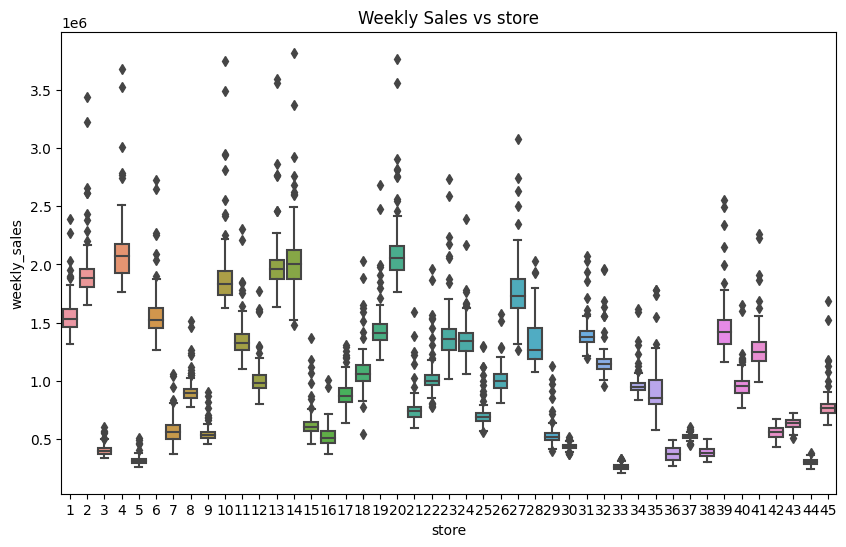

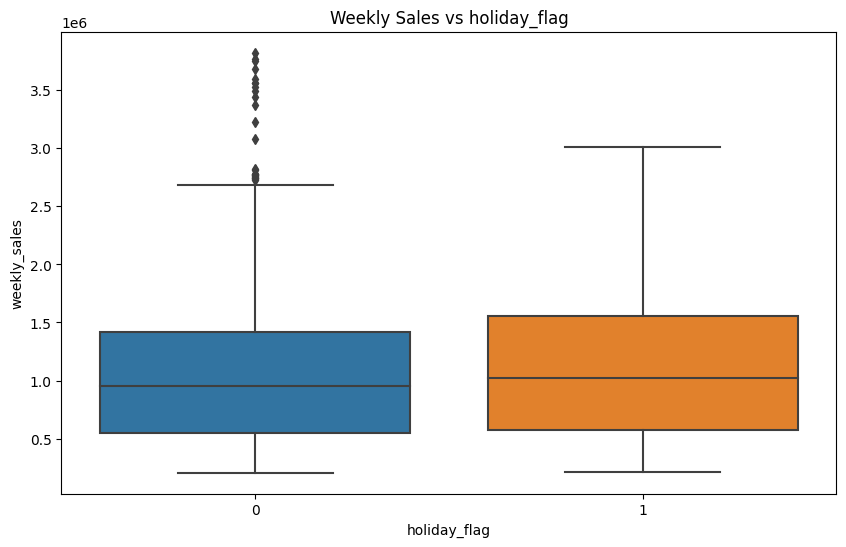

In [ ]:
### Plotting boxplot between "Weekly Sales" and categorical predictor variables

categorical_variables = ['store', 'holiday_flag']

for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='weekly_sales', data=df_walmart)
    plt.title(f'Weekly Sales vs {var}')
    plt.show()

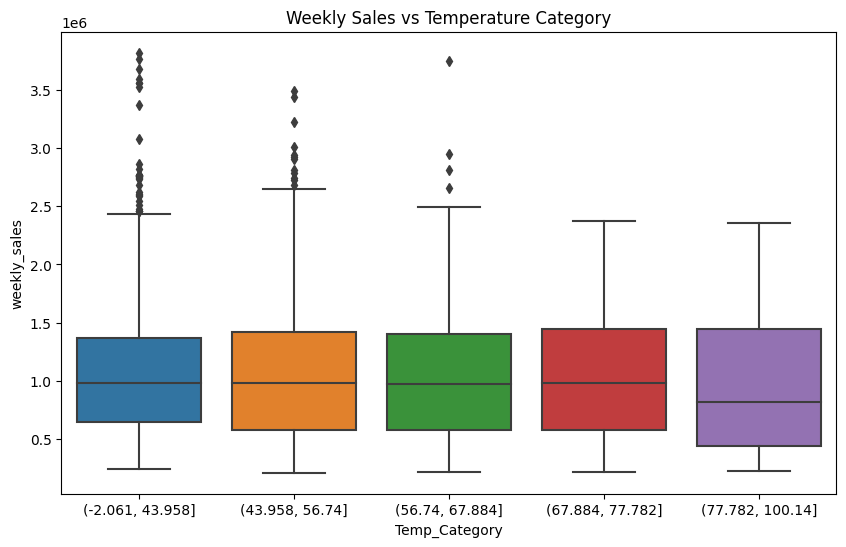

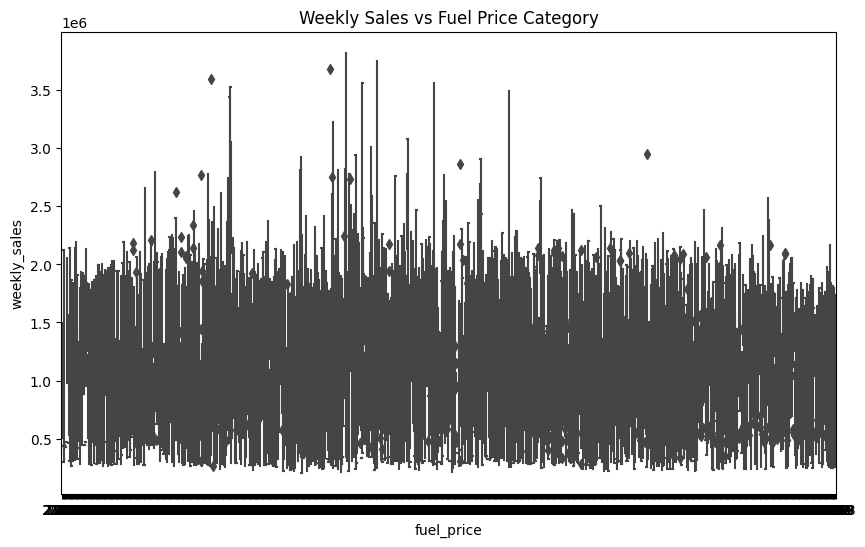

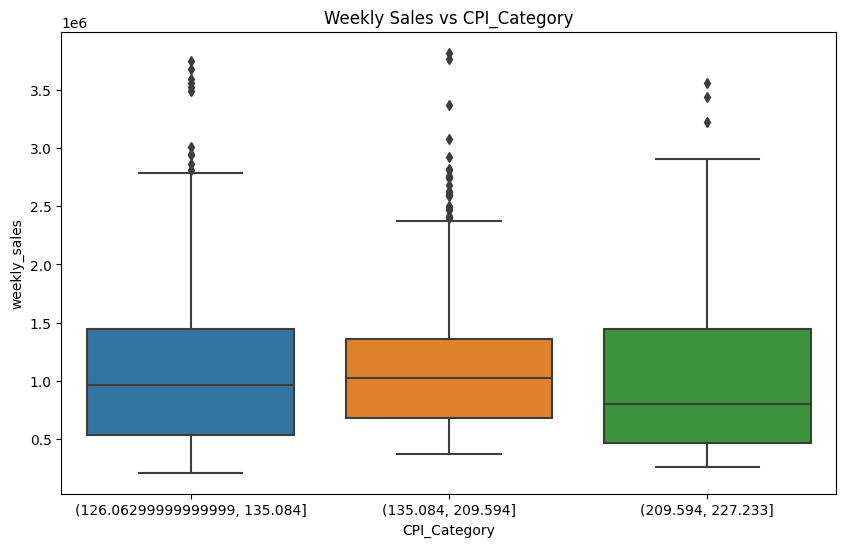

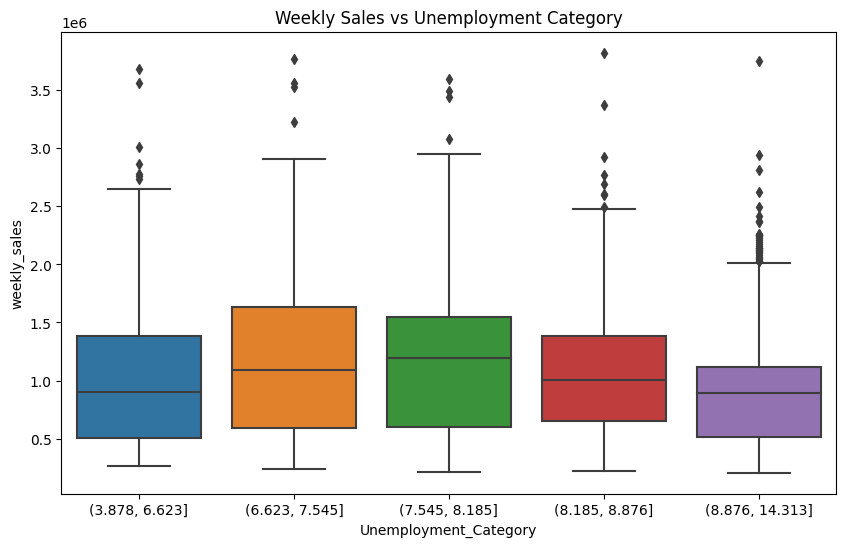

In [ ]:
### Plotting boxplot between "Weekly Sales" and numerical predictor variables
numerical_variables = ["temperature", "fuel_price", "cpi", "unemployment"]

### Creating bins for 'Temperature'
df_walmart['Temp_Category'] = pd.qcut(df_walmart['temperature'], q=5)

### Boxplot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Temp_Category', y='weekly_sales', data=df_walmart)
plt.title('Weekly Sales vs Temperature Category')
plt.show()

### Creating bins for 'Fuel Price'
df_walmart['Fuel_Price_Category'] = pd.qcut(df_walmart['fuel_price'], q=0)

### Boxplot for 'Fuel Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_price', y='weekly_sales', data=df_walmart)
plt.title('Weekly Sales vs Fuel Price Category')
plt.show()

### Creating bins for 'CPI'
df_walmart['CPI_Category'] = pd.qcut(df_walmart['cpi'], q=3)

### Boxplot for 'CPI'
plt.figure(figsize=(10, 6))
sns.boxplot(x='CPI_Category', y='weekly_sales', data=df_walmart)
plt.title('Weekly Sales vs CPI_Category')
plt.show()

### Creating bins for 'Unemployment'
df_walmart['Unemployment_Category'] = pd.qcut(df_walmart['unemployment'], q=5)

### Boxplot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Unemployment_Category', y='weekly_sales', data=df_walmart)
plt.title('Weekly Sales vs Unemployment Category')
plt.show()

##Seasonal Plot to identify how these predictors trend over time.

In [ ]:
df_walmart[numerical_features].corr()

,weekly_sales,temperature,fuel_price,cpi,unemployment
weekly_sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
fuel_price,0.009464,0.144982,1.000000,-0.170642,-0.034684
cpi,-0.072634,0.176888,-0.170642,1.000000,-0.302020
unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


Data Correlation

To indentify the measure of interdependence and linearity between two variables

1 - Positive Linear Correlation, -1 negative linear correlation, 0 No Linear Correlation

In [ ]:
"""
 We also check the P-Value that is probability value that the correlation
 between the two variables is statistically significant.

 By default the function takes 95% confidence interval
 P-Value < 0.001
 We conclude that there is a strong evidence that correlation is significant
 P-Value < 0.05
 There is moderate evidence that correlation is significant
 P-Value < 0.1
 There is weak evidence that the correlation is significant
 P-Value > 0.1
 There is no evidence that the correlation is significant
"""

from scipy.stats import pearsonr
def check_correlation_with_plot(dataframe, X_column, Y_column):
      pearson_coef, p_value = pearsonr(dataframe[X_column],
                                       dataframe[Y_column])
      print(f"The Pearson Co-efficient is {pearson_coef}")
      print(f"The P_Value for {X_column} vs {Y_column} is {p_value:.4f}")
      plt.figure(figsize=(14,5))
      sns.regplot(data = dataframe, x = X_column, y = Y_column,
                  color = '#145DA0', line_kws = {'color': 'red'})
      plt.show()
      return {"pearson_coeff": pearson_coef,
              "p_value": p_value,
              "plot": plt
              }

The Pearson Co-efficient is 0.009463786314475135
The P_Value for fuel_price vs weekly_sales is 0.4478


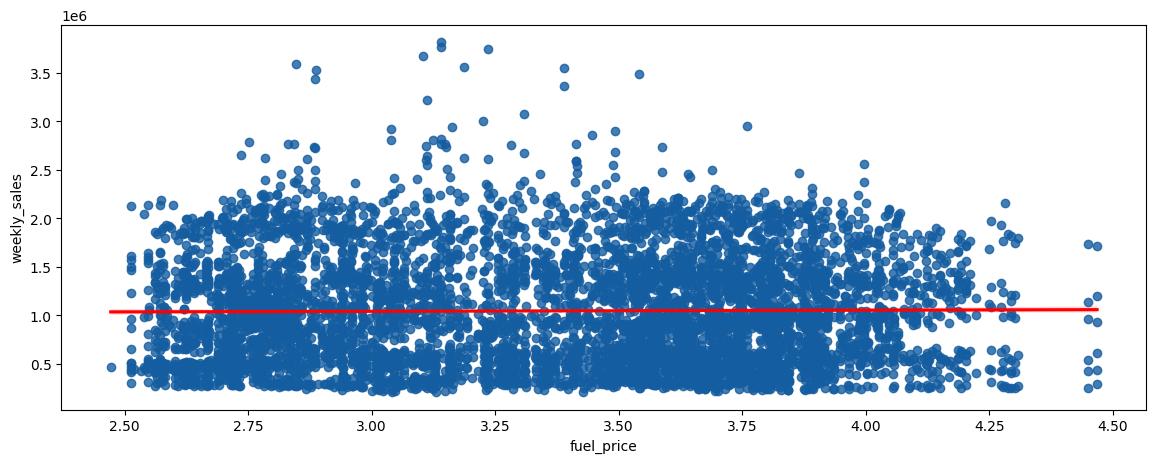

'\nP-Value is 0.009463786314475135 that is greater than 0.1 stating\ncorrelation between fuel price and\nweekly sales is not statistically significant. Hence fuel price is not a reliable\nvariable to predict weekly_sales.\n'

In [ ]:
"""
Fuel Price and Weekly Sales
"""
fuel_price_corr = check_correlation_with_plot(
    dataframe=df_walmart,
    X_column = "fuel_price",
    Y_column = "weekly_sales"
)

"""
P-Value is 0.009463786314475135 that is greater than 0.1 stating
correlation between fuel price and
weekly sales is not statistically significant. Hence fuel price is not a reliable
variable to predict weekly_sales.
"""

The Pearson Co-efficient is -0.10617608965795423
The P_Value for unemployment vs weekly_sales is 0.0000


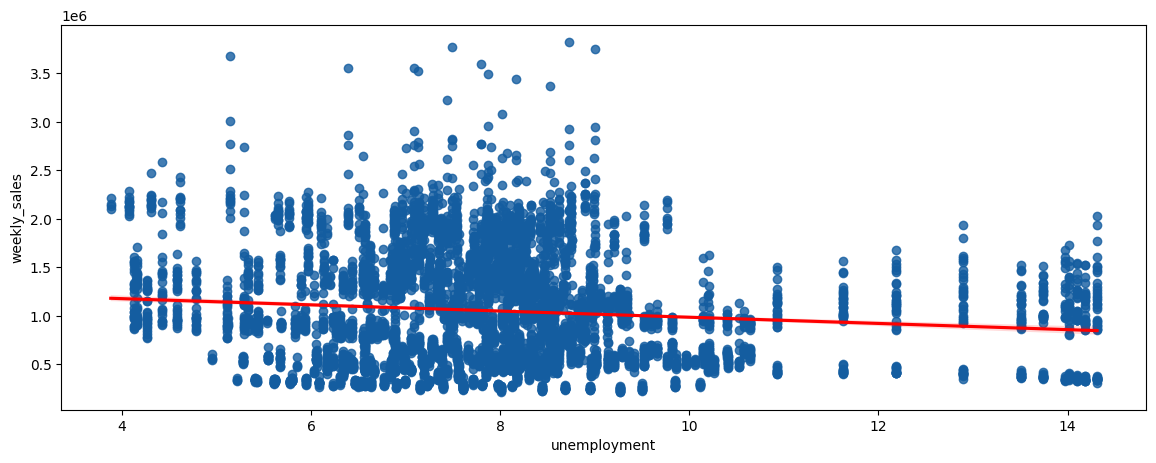

'P-Value is -0.10617608965795423 that is less than 0.1 stating\ncorrelation between unemployment and\nweekly sales is statistically significant. Higher the unemployment rate, lower\nthe weekly sales making it a good predictor.\n'

In [ ]:
"""
Unemployment and Weekly Sales
"""
fuel_price_corr = check_correlation_with_plot(
    dataframe=df_walmart,
    X_column = "unemployment",
    Y_column = "weekly_sales"
)

"""P-Value is -0.10617608965795423 that is less than 0.1 stating
correlation between unemployment and
weekly sales is statistically significant. Higher the unemployment rate, lower
the weekly sales making it a good predictor.
"""

The Pearson Co-efficient is -0.07263416204017623
The P_Value for cpi vs weekly_sales is 0.0000


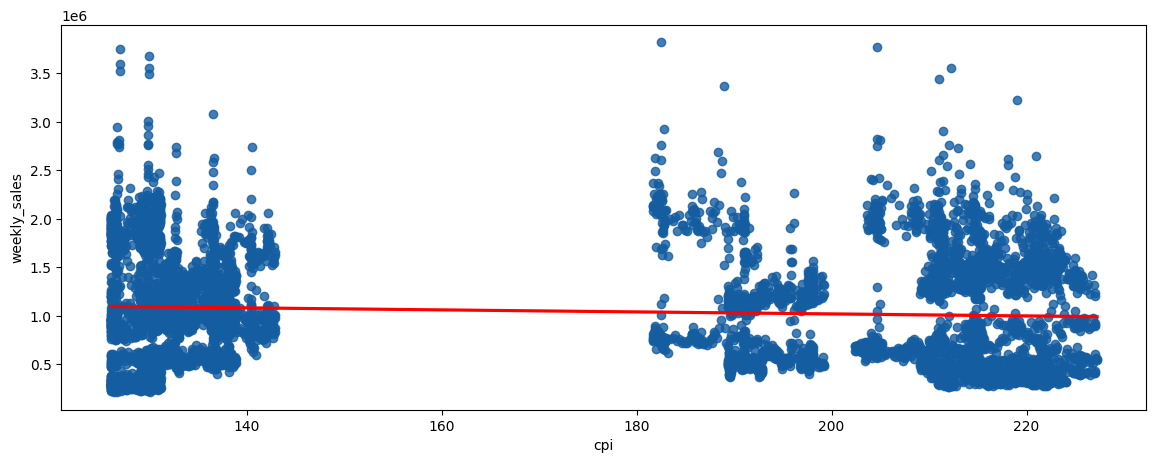

'\nP-Value is 0.009463786314475135 that is less than 0.1 stating\ncorrelation between cpi and\nweekly sales is statistically significant.\n'

In [ ]:
"""
CPI and Weekly Sales
"""
fuel_price_corr = check_correlation_with_plot(
    dataframe=df_walmart,
    X_column = "cpi",
    Y_column = "weekly_sales"
)

"""
P-Value is 0.009463786314475135 that is less than 0.1 stating
correlation between cpi and
weekly sales is statistically significant.
"""

The Pearson Co-efficient is -0.06381001317946956
The P_Value for temperature vs weekly_sales is 0.0000


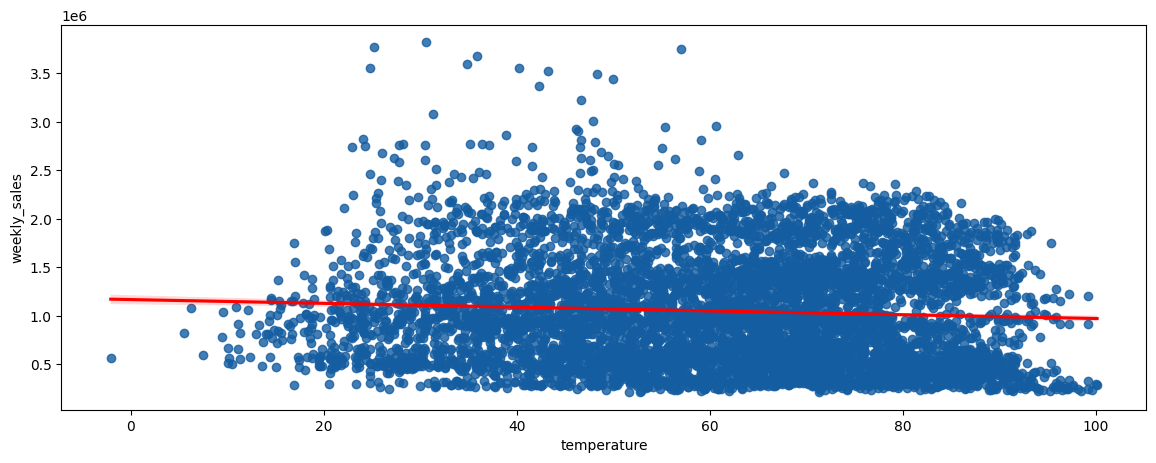

'\nP-Value is -0.06381001317946956 that is less than 0.1 stating moderate evidence\nthat the correlation between cpi and\nweekly sales is statistically significant.\n'

In [ ]:
"""
Temperature and Weekly Sales
"""
fuel_price_corr = check_correlation_with_plot(
    dataframe=df_walmart,
    X_column = "temperature",
    Y_column = "weekly_sales"
)

"""
P-Value is -0.06381001317946956 that is less than 0.1 stating moderate evidence
that the correlation between cpi and
weekly sales is statistically significant.
"""

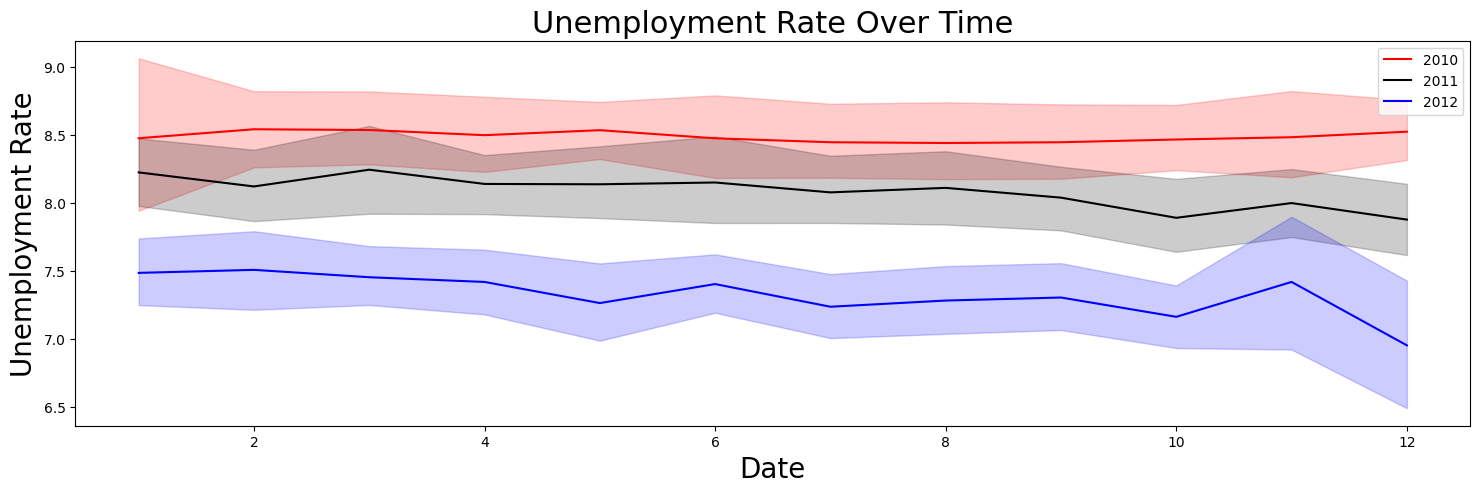

In [ ]:
years = ['2010', '2011', '2012']
colors = ['red', 'black', 'blue']
plt.figure(figsize = (18, 5))
import numpy as np
for i, year in enumerate(years):
    sns.lineplot(data = df_walmart[df_walmart['year'] == int(year)],
                 x = 'month',
                 y = 'unemployment',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Unemployment Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Unemployment Rate', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##This shows unemployment rate decrease over time.

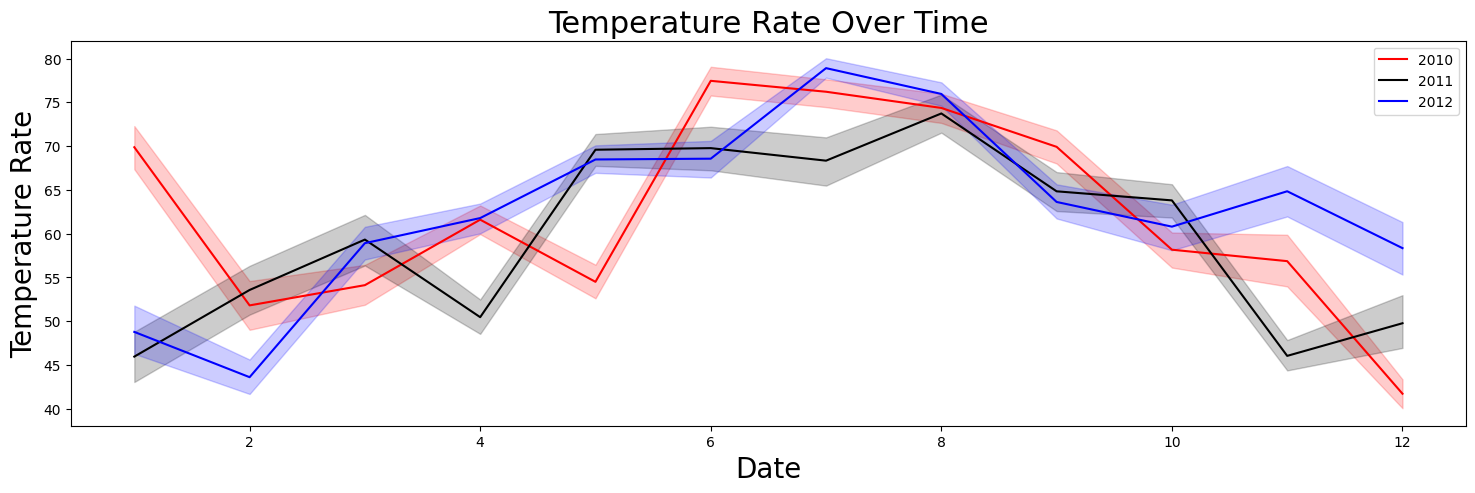

In [ ]:
years = ['2010', '2011', '2012']
colors = ['red', 'black', 'blue']
plt.figure(figsize = (18, 5))
import numpy as np
for i, year in enumerate(years):
    sns.lineplot(data = df_walmart[df_walmart['year'] == int(year)],
                 x = 'month',
                 y = 'temperature',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Temperature Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Temperature Rate', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##This shows unemployment rate decrease over time.

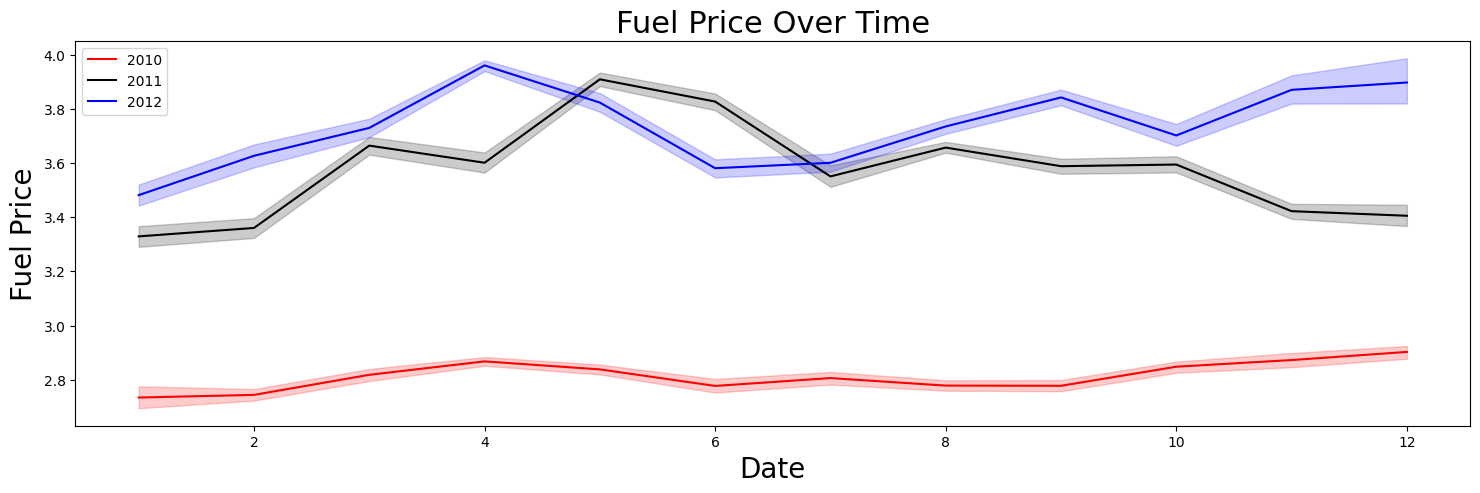

In [ ]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df_walmart[df_walmart['year'] == int(year)],
                 x = 'month',
                 y = 'fuel_price',
                 estimator = np.mean,
                 color = colors[i],
                 label = year
                 )

# Add labels and title
plt.title(f'Fuel Price Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Fuel Price', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()



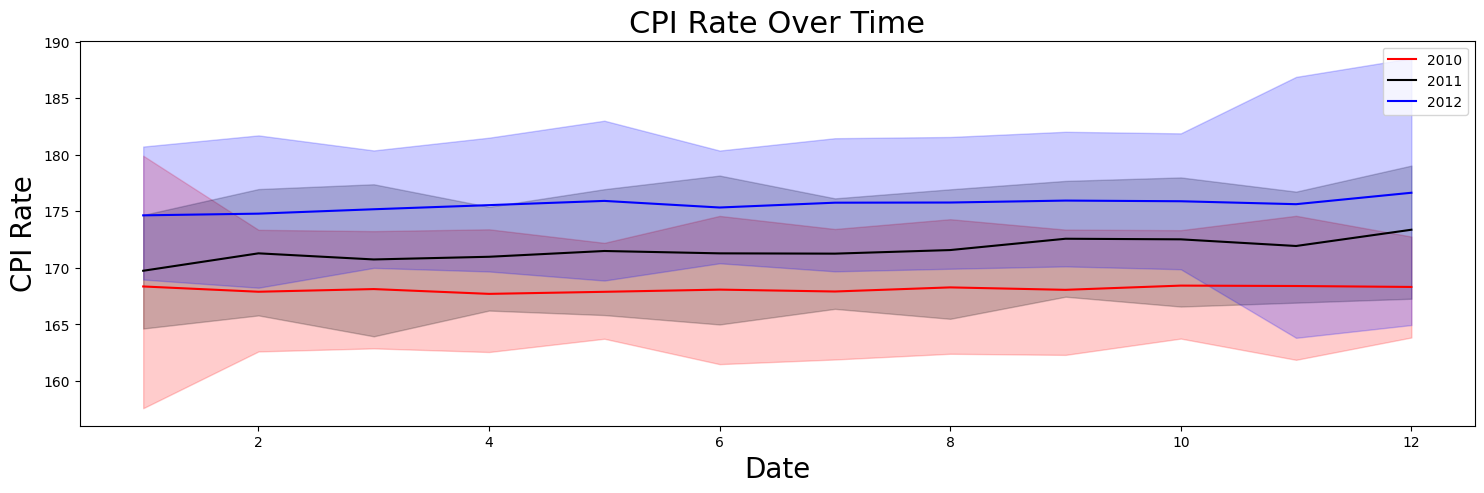

In [ ]:
years = ['2010', '2011', '2012']
colors = ['red', 'black', 'blue']
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = df_walmart[df_walmart['year'] == int(year)],
                 x = 'month',
                 y = 'cpi',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'CPI Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('CPI Rate', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Split the Data in Training(80%) and Testing(20%)


In [ ]:
from sklearn.model_selection import train_test_split
X = df_walmart_prepd.drop("weekly_sales", axis=1)
y = df_walmart_prepd["weekly_sales"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )


In [ ]:
numerical_features = df_walmart_prepd.select_dtypes("number").columns.to_list()
numerical_features.remove("weekly_sales") ##As it is our target variable

categorical_features = df_walmart_prepd.select_dtypes("object").columns.to_list()
print(numerical_features, categorical_features)


['temperature', 'fuel_price', 'cpi', 'unemployment'] ['store', 'holiday_flag', 'month', 'week']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from category_encoders import BinaryEncoder
model_preprocessor = ColumnTransformer([("numerical_features", StandardScaler(),
                                   numerical_features),
                                  ("categorical_features", BinaryEncoder(),
                                   categorical_features)])
model_preprocessor.fit(X_train)
print(len(numerical_features)+len(categorical_features))

8


In [ ]:
X_transform_train = model_preprocessor.transform(X_train)
X_transform_test = model_preprocessor.transform(X_test)

Functions for model evaluation, finetuning and plotting

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

def evaluate_model(model, training_testing_data, X, y):
    predicted_values = model.predict(X)
    rmse = round(np.sqrt(mean_squared_error(y, predicted_values)), 2)
    r2_value = round(r2_score(y, predicted_values) * 100, 2)

    # Number of observations and number of features
    n = len(y)
    p = X.shape[1]

    # Calculate adjusted R2 score
    adjusted_r2 = 1 - (1 - r2_value) * (n - 1) / (n - p - 1)

    print(f'RMSE: {rmse}')
    print(f'R Squared Value: {r2_value}')
    print(f'Adjusted R Squared Value: {adjusted_r2}')
    return rmse, r2_value, adjusted_r2

def plot_distribution(model, training_testing_data, X, y, title):
    from sklearn.metrics import PredictionErrorDisplay
    import matplotlib.pyplot as plt
    import seaborn as sns

    y_hat = model.predict(X)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4)
    )  # Adjust the figsize as needed

    # Plotting actual vs. predicted values using seaborn
    ax1 = sns.distplot(y, hist=False, color='b',
                       label=f'Actual Values {training_testing_data}', ax=axes)
    sns.distplot(y_hat, hist=False, color='r',
                 label=f'Predicted Values {training_testing_data}', ax=ax1)

    fig.tight_layout()
    plt.show()

      # Plotting prediction error using scikit-learn's plot_prediction_error
    display =  PredictionErrorDisplay(y_true=y, y_pred=y_hat)
    display.plot()




def cross_validation_score(model, X_train, y_train, score='r2', n=5):
    validate = cross_val_score(model, X_train, y_train, scoring=score, cv=n)
    print(f'Cross Validation Scores: {validate}')
    print(f'Mean of Scores: {round(validate.mean()*100, 2)} %')
    print(f'Standard Deviation of Scores: {validate.std()}')

def model_hyperparameter_tuning(model, X_train, y_train, param_grid,
                                score='r2', n=5):
    grid_search = GridSearchCV(model,
                               param_grid=param_grid,
                               scoring=score,
                               cv=n
                               )
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f'Best parameters: {best_params}')
    print(f'Best score: {best_score}')

    best_model = grid_search.best_estimator_
    return best_model


def perform_model_evaluation(model, X, y_true, is_train=True):
    rmse, r2_score, adjusted_r2_score = evaluate_model(model,
                                    "Training" if is_train else "Testing",
                                    X,
                                    y_true)
    cross_val_score = cross_validation_score(model_lr,
                                              X,
                                              y_true)
    return {"rmse": rmse,
            "r2_score": r2_score,
            "cross_val_score": cross_val_score,
            "adjusted_r2_score": adjusted_r2_score
            }

###Linear Regression
Modeling relationships between a dependent variable and one or more independent variables. Used for prediction, but not specifically for time series forecasting.

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_transform_train, y_train)

LinearRegression()

In [ ]:
print(f'Model Intercept: {model_lr.intercept_}')
print(f'Model Coefficients: {model_lr.coef_}')

Model Intercept: 1165689.5133452653
Model Coefficients: [ -26369.91559782   10358.95986086  -76123.22161137  -32502.58843084
   97274.07664067  -93314.65451353  195914.22733281   55116.23043399
 -233337.94572277  -31265.6246115    19447.90278881  -19447.90278881
  -26811.92441963   60643.05781886   19059.84574834  -67316.98046252
  -30286.18908133  -34457.02279008  -41474.18841755   24880.2187828
   -8061.82917009  -33934.30366045]


RMSE: 541077.59
R Squared Value: 10.68
Adjusted R Squared Value: 10.72555294117647
Cross Validation Scores: [0.08883767 0.0765418  0.11619003 0.12227135 0.09075447]
Mean of Scores: 9.89 %
Standard Deviation of Scores: 0.01739340382231164


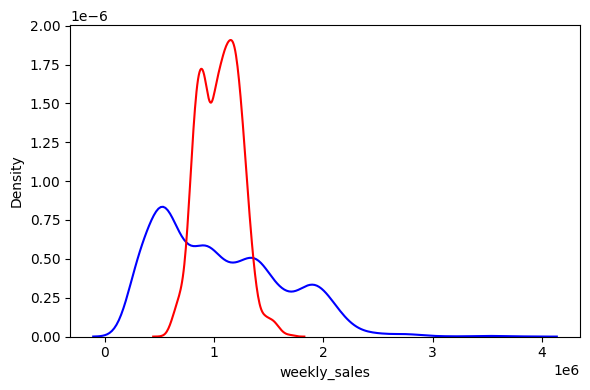

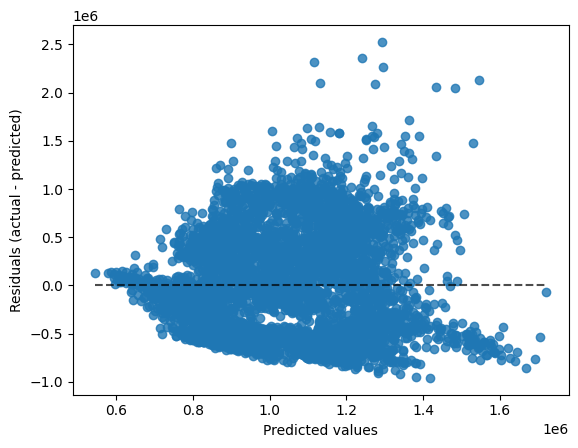

In [ ]:
perform_model_evaluation(model_lr,
                          X_transform_train,
                          y_train,
                         is_train=True)
import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 2)"
plot_distribution(model_lr, "Training", X_transform_train, y_train, title)
# plot_distribution_residual(model_lr, "Training", X_transform_train, y_train, title)





Best parameters: {'poly_feat__degree': 2}
Best score: 0.690002204696565
RMSE: 301394.45
R Squared Value: 72.29
Adjusted R Squared Value: 72.62548235294118
Cross Validation Scores: [0.08883767 0.0765418  0.11619003 0.12227135 0.09075447]
Mean of Scores: 9.89 %
Standard Deviation of Scores: 0.01739340382231164


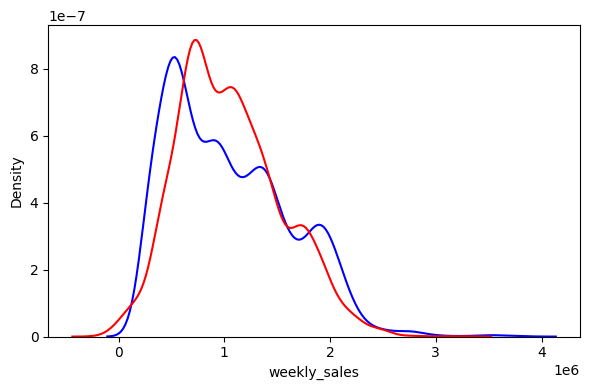

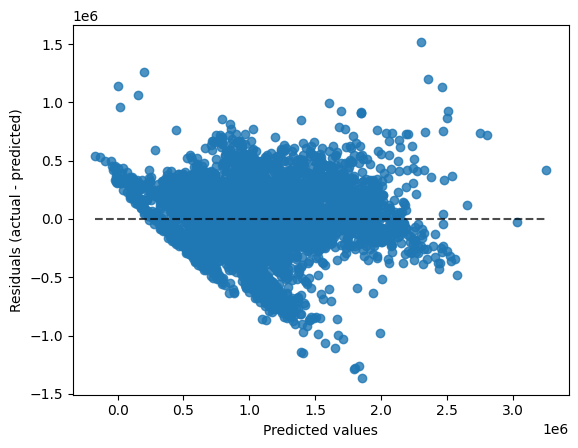

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [2]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )

perform_model_evaluation(model_plr_best,
                          X_transform_train,
                          y_train,
                         is_train=True)
import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 2)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)


Best parameters: {'poly_feat__degree': 3}
Best score: 0.9463681282067128
RMSE: 80146.11
R Squared Value: 98.04
Adjusted R Squared Value: 98.49665882352942
Cross Validation Scores: [0.9539778  0.94664209 0.94966616 0.95748678 0.92406781]
Mean of Scores: 94.64 %
Standard Deviation of Scores: 0.011745534221813769


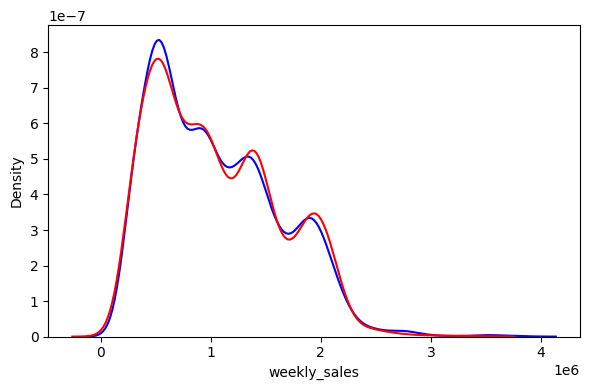

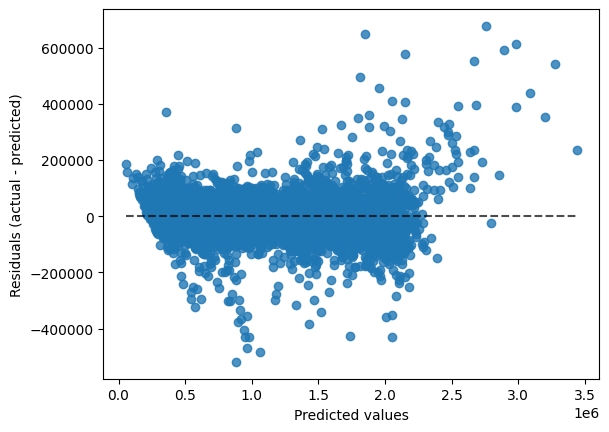

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [3]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )
evaluate_model(model_plr_best,
               "Training",
               X_transform_train,
               y_train)



cross_validation_score(model_plr_best, X_transform_train, y_train)


import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 3)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)

Best parameters: {'poly_feat__degree': 4}
Best score: 0.7637456992558965
RMSE: 0.0
R Squared Value: 100.0
Adjusted R Squared Value: 100.46588235294118
Cross Validation Scores: [0.77667316 0.74488414 0.79240875 0.75183622 0.75292623]
Mean of Scores: 76.37 %
Standard Deviation of Scores: 0.01790723265262262


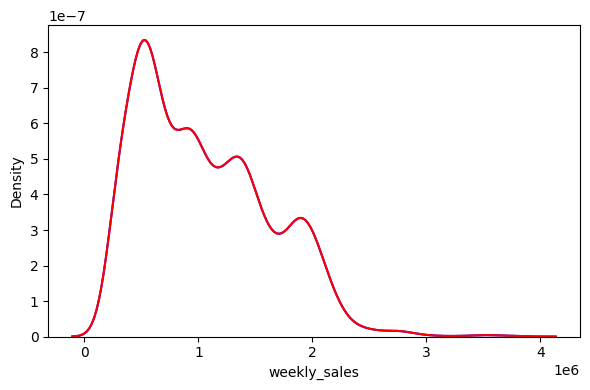

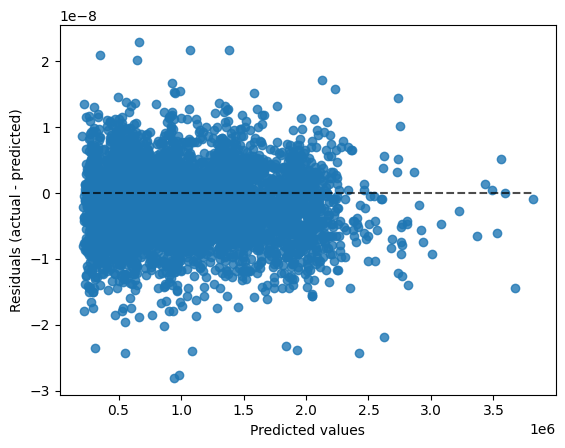

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [4]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )
evaluate_model(model_plr_best,
               "Training",
               X_transform_train,
               y_train)

cross_validation_score(model_plr_best, X_transform_train, y_train)

import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 4)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)

Best parameters: {'poly_feat__degree': 3}
Best score: 0.9463681282067128
RMSE: 80146.11
R Squared Value: 98.04
Adjusted R Squared Value: 98.49665882352942
Cross Validation Scores: [0.9539778  0.94664209 0.94966616 0.95748678 0.92406781]
Mean of Scores: 94.64 %
Standard Deviation of Scores: 0.011745534221813769


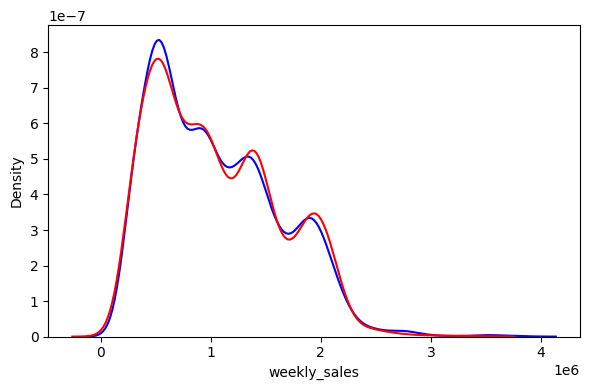

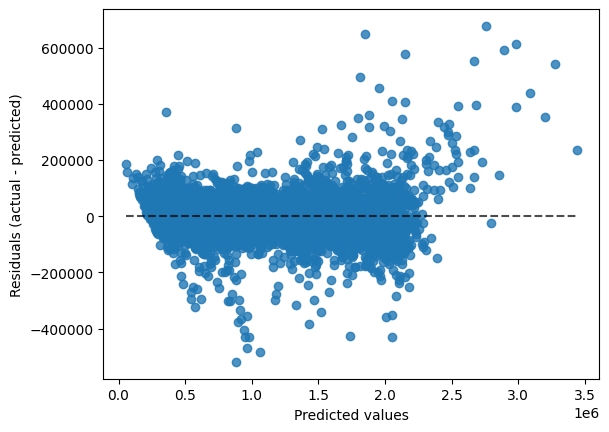

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [2, 3, 4, 5]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )
evaluate_model(model_plr_best,
               "Training",
               X_transform_train,
               y_train)

cross_validation_score(model_plr_best, X_transform_train, y_train)

import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 5)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [6]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )
evaluate_model(model_plr_best,
               "Training",
               X_transform_train,
               y_train)

import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 6)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)

cross_validation_score(model_plr_best, X_transform_train, y_train)

In [ ]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([
    ('poly_feat', PolynomialFeatures()),
    ('line_reg', LinearRegression())
])
param_grid = {'poly_feat__degree': [7]}

model_plr_best = model_hyperparameter_tuning(pipe_lr,
                                            X_transform_train, y_train,
                                            param_grid, score='r2', n=5
                                            )
evaluate_model(model_plr_best,
               "Training",
               X_transform_train,
               y_train)

import warnings
warnings.filterwarnings("ignore")

title = "Predicted Vs Actual Value Distribution Plot (Order 7)"
plot_distribution(model_plr_best, "Training", X_transform_train, y_train, title)

cross_validation_score(model_plr_best, X_transform_train, y_train)